
# **Import Dataset**
Load the data from the provided CSV file into a pandas DataFrame.

In [659]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Scarped Zameen.csv")
display(df.head())
#head.()- display the first 5 rows of the dataset


,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**
Explore the loaded data to understand its structure and basic statistics.
Explore the data's structure, data types, descriptive statistics, unique values in categorical columns, and display the first few rows to understand the data better. This can be done in a single code block.

In [660]:
# Check dimensions
print("Shape of the DataFrame:", df.shape)
display(df.info()) # Display basic information about the dataset
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['Type', 'Purpose',]:  # Example categorical columns
    print(f"\nColumn '{col}':")
    print(df[col].unique())
    print(df[col].value_counts())





Shape of the DataFrame: (18255, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null 

None


Unique values in categorical columns:

Column 'Type':
['Flat' 'House' 'Upper Portion' 'Lower Portion' 'Penthouse' 'Farm House'
 nan 'Room']
Type
House            13386
Flat              2892
Upper Portion     1247
Lower Portion      560
Farm House          89
Room                43
Penthouse           22
Name: count, dtype: int64

Column 'Purpose':
['For Sale' nan 'For ']
Purpose
For Sale    11126
For          7113
Name: count, dtype: int64


# **Standardization of Data**
we implemented various functions to standardise the collected information. These included function such as to convert prices into a normalised form in PKR, accounting for variations like Lakhs and Millions and standardise of property sizes to square feet, overcoming inconsistent units such as Marla and Kanal.

In [661]:
# Import necessary libraries
import re  # For regular expressions to clean text
import numpy as np  # For handling missing values

# Function to clean and convert price strings into numeric PKR values
def clean_price(price):
    # Check if the price is a string (to avoid applying it on NaN or already cleaned numbers)
    if isinstance(price, str):
        # Remove currency symbols, commas, and non-breaking space characters
        price = price.replace("PKR", "").replace(",", "").replace("\xa0", "").strip().lower()
        try:
            # Convert based on unit mentioned in the string
            if "crore" in price:
                # 1 crore = 10 million
                return float(re.sub(r"[^0-9.]", "", price)) * 10000000
            elif "lakh" in price:
                # 1 lakh = 100,000
                return float(re.sub(r"[^0-9.]", "", price)) * 100000
            elif "million" in price:
                return float(re.sub(r"[^0-9.]", "", price)) * 1000000
            elif "thousand" in price:
                return float(re.sub(r"[^0-9.]", "", price)) * 1000
            elif "arab" in price:
                # 1 arab = 1 billion = 1,000,000,000
                return float(re.sub(r"[^0-9.]", "", price)) * 1000000000
            else:
                # If no unit is mentioned, just extract the number
                return float(re.sub(r"[^0-9.]", "", price))
        except:
            # If conversion fails, return NaN
            return np.nan
    # If the input is not a string, return NaN
    return np.nan

# Apply the cleaning function to the 'Price' column
df['Price'] = df['Price'].apply(clean_price)

# Display the first 5 cleaned prices
print(df['Price'].head())

# Confirm the data type is now float
print(df['Price'].dtype)


0    47500000.0
1    62500000.0
2    34500000.0
3    29800000.0
4    46500000.0
Name: Price, dtype: float64
float64


# **Standardize Area Column**

In [662]:
# Import required libraries
import re       # For regular expressions to extract numbers and units from strings
import numpy as np  # For handling missing or undefined values

# Function to convert different area units into square feet (sqft)
def convert_area_to_sqft(area):
    # Return NaN if the input is not a string (e.g., already missing)
    if not isinstance(area, str):
        return np.nan

    # Clean the area string by removing special characters and standardizing format
    area = area.replace('\n', ' ') \
               .replace('\xa0', ' ') \
               .replace(',', '') \
               .replace('·', '') \
               .lower().strip()

    total_sqft = 0  # Variable to accumulate converted square feet

    #  Match and convert Kanal → 1 Kanal = 5445 sqft (standard for Zameen)
    kanal = re.findall(r'(\d+\.?\d*)\s*kanal', area)
    if kanal:
        total_sqft += sum([float(k) * 5445 for k in kanal])

    #  Match and convert Marla → 1 Marla = 272.25 sqft (standard size)
    marla = re.findall(r'(\d+\.?\d*)\s*marla', area)
    if marla:
        total_sqft += sum([float(m) * 272.25 for m in marla])

    #  Match and convert Square Yards → 1 Sq. Yd = 9 sqft
    sq_yd = re.findall(r'(\d+\.?\d*)\s*sq\.?\s*yd', area)
    if sq_yd:
        total_sqft += sum([float(y) * 9 for y in sq_yd])

    #  Match and convert Square Feet → Already in sqft
    sq_ft = re.findall(r'(\d+\.?\d*)\s*sq\.?\s*ft', area)
    if sq_ft:
        total_sqft += sum([float(f) for f in sq_ft])

    #  Match and convert Acres → 1 Acre = 43,560 sqft
    acre = re.findall(r'(\d+\.?\d*)\s*acre', area)
    if acre:
        total_sqft += sum([float(a) * 43560 for a in acre])

    # Return total sqft if any unit matched, else return NaN
    return total_sqft if total_sqft > 0 else np.nan
# Apply the convert_area_to_sqft function to the 'Area' column
# This will convert all area values to a uniform unit: square feet
df['Area'] = df['Area'].apply(convert_area_to_sqft)

# Display a random sample of 10 converted area values to verify the transformation
print(df['Area'].head())

# Check the data type of the 'Area' column to confirm it's now numeric (float)
print(df['Area'].dtype)



0    1152.0
1    1449.0
2     999.0
3     954.0
4    1404.0
Name: Area, dtype: float64
float64


# **Drop Columns with All Missing Values**
These are useless columns with 100% NaN, and we can safely remove them.

In [663]:
df.dropna(axis=1, how='all', inplace=True)

**Explore data again after drop columns which have all rows empty**

In [664]:
print(df.shape)        # See new shape
print(df.columns)      # List of remaining useful columns

(18255, 17)
Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces', 'Floors', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms'],
      dtype='object')


**Check Datatype of each column**

In [665]:
df.dtypes

,0
Title,object
URL,object
City,object
Type,object
Area,float64
Price,float64
Purpose,object
Location,object
Description,object
Built in year,float64


# **Fix Data Types (Final Cleanup Before Imputation)**
 We’ll convert Bedrooms, Bathrooms, from object to float, so we can handle missing values properly.



In [666]:
# Convert Bedrooms and Bathrooms to numeric (float), safely
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')
# (If needed) Run for other columns like this:
columns_to_convert = ['Bedrooms', 'Bathrooms', 'Floors', 'Parking Spaces', 'Servant Quarters', 'Kitchens', 'Store Rooms']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')



# **Confirm Data Types**

In [667]:
print(df.dtypes)



Title                object
URL                  object
City                 object
Type                 object
Area                float64
Price               float64
Purpose              object
Location             object
Description          object
Built in year       float64
Parking Spaces      float64
Floors              float64
Bedrooms            float64
Bathrooms           float64
Servant Quarters    float64
Kitchens            float64
Store Rooms         float64
dtype: object


# **Count Missing Values**

In [668]:
# Count missing values per column
missing_count = df.isnull().sum()

# Calculate total number of rows in the DataFrame
total_rows = len(df)

# Calculate % of missing values per column
missing_percent = (missing_count / total_rows) * 100

# Combine both counts and % into one DataFrame for a clear summary
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percent Missing': missing_percent.round(2)
})

# Sort by highest % missing
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False)

# Display the summary
print(missing_summary)


                  Missing Values  Percent Missing
Floors                      9889            54.17
Parking Spaces              8599            47.10
Servant Quarters            8598            47.10
Store Rooms                 8536            46.76
Built in year               6315            34.59
Kitchens                    4999            27.38
Description                 3362            18.42
Bathrooms                   1153             6.32
Bedrooms                     955             5.23
Area                          22             0.12
Location                      16             0.09
Title                         16             0.09
Purpose                       16             0.09
Price                         16             0.09
Type                          16             0.09


# **Drop the Floors Columns**
Drop columns with ≥50% missing values

In [669]:
#  Drop 'Floors' column due to high missing value percentage (>50%)
# Drop 'Floors' only if it's present
df.drop(columns=[col for col in ['Floors'] if col in df.columns], inplace=True)

In [670]:
#  Check if 'Floors' is successfully dropped
print('Floors' in df.columns)  # Should return False

False


# **📊 Bedrooms Column Analysis: Distribution, Outliers, and Imputation Strategy**
Bedrooms column have 5.23 % missing values so we impute with mean or median after visulize distribution.


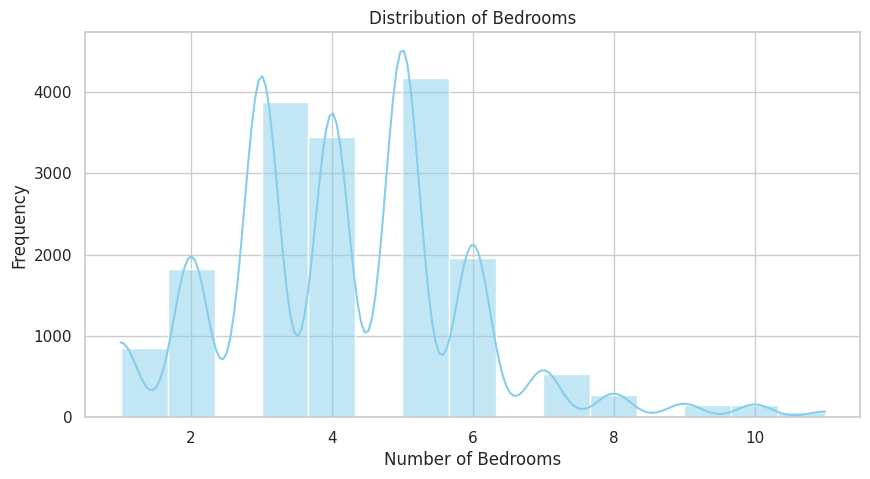

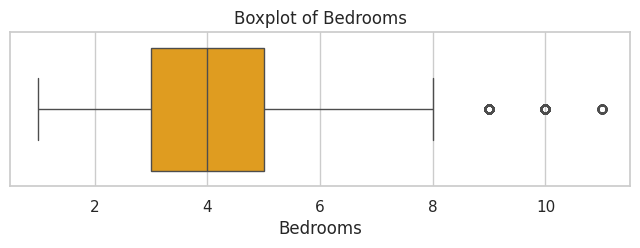

Skewness of Bedrooms: 0.64
Approximately Normal → Use Mean or Median


In [671]:
# Import necessary libraries for visualization and statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# Ensure 'Bedrooms' column is numeric; convert any non-numeric values to NaN
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')

# Plotting the histogram to visualize the distribution of bedrooms
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df["Bedrooms"].dropna(), bins=15, kde=True, color='skyblue')  # Histogram with KDE curve
plt.title("Distribution of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to detect outliers in the 'Bedrooms' column
plt.figure(figsize=(8, 2))  # Horizontal boxplot
sns.boxplot(x=df["Bedrooms"].dropna(), color='orange')
plt.title("Boxplot of Bedrooms")
plt.show()

# Calculate skewness to determine the distribution shape
bedroom_skew = skew(df["Bedrooms"].dropna())
print(f"Skewness of Bedrooms: {bedroom_skew:.2f}")

# Suggest imputation strategy based on skewness
if bedroom_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif bedroom_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")

**Impute with Median as**

Skewness = 0.64 (Bedrooms)
That means:

The distribution is moderately positively skewed Use Median (safer)

In [672]:
# Impute missing values in the 'Bedrooms' column using the median (robust to outliers and slight skewness)
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
print(df['Bedrooms'].isnull().sum())

0


# **Outlier Detection Using IQR Method for 'Bedrooms' Column**

In [673]:
def detect_outliers_iqr(data, column_name):
    """
    Detects outliers in a specified numeric column using the IQR method.

    Parameters:
    - data: DataFrame
    - column_name: str, name of the column to check for outliers

    Returns:
    - outliers: DataFrame containing rows where values are outside the IQR bounds
    """

    # Step 1: Calculate 1st and 3rd quartiles (Q1 = 25th percentile, Q3 = 75th percentile)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Step 2: Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Step 3: Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 4: Identify values outside these bounds as outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Step 5: Print details
    print(f"\nOutliers in '{column_name}':")
    print(outliers[[column_name]])
    print(f"\nCount of outliers in '{column_name}': {outliers.shape[0]}")

    return outliers

#  Ensure 'Bedrooms' column is numeric to avoid errors
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')

# 🔍 Detect outliers in the 'Bedrooms' column using the IQR method
bedroom_outliers = detect_outliers_iqr(df, 'Bedrooms')




Outliers in 'Bedrooms':
       Bedrooms
6           9.0
106        11.0
131        11.0
188         9.0
238        10.0
...         ...
17419      10.0
17560      10.0
17858       9.0
17865      10.0
18234      11.0

[362 rows x 1 columns]

Count of outliers in 'Bedrooms': 362


In [674]:
#df[df["Bedrooms"]>=10]
df[df['Bedrooms'] >= 10][['Price', 'Area', 'Bedrooms', 'City', 'Purpose','Location','Title',]]

,Price,Area,Bedrooms,City,Purpose,Location,Title
106,26500000.0,720.0,11.0,Karachi,For Sale,"Jamshed Town, Karachi, Sindh",80sq yard house fully furnished Ground +3 with...
131,26000000.0,810.0,11.0,Karachi,For Sale,"Liaquatabad, Karachi, Sindh",Prominently-Located Prime Location 90 Square Y...
238,45500000.0,1854.0,10.0,Karachi,For Sale,"North Nazimabad, Karachi, Sindh",G+2 Bungalow Available For Sale
296,75000000.0,3600.0,10.0,Karachi,For Sale,"North Nazimabad, Karachi, Sindh",G+2 HOUSE FOR SALE 400 Sq Yd In North Nazimaba...
360,280000000.0,9000.0,11.0,Karachi,For Sale,"DHA Defence, Karachi, Sindh",1000 Sq. Yds. Brand New Bungalow For Sale At P...
...,...,...,...,...,...,...,...
17267,1650000.0,13068.0,11.0,Lahore,For,"Gulberg, Lahore, Punjab","CANTT,COMMERCIAL BUILDING FOR MAIN BOULEVARD ..."
17419,1500000.0,21780.0,10.0,Lahore,For,"Gulberg, Lahore, Punjab",4 Kanal Commercial House Is Available For . Be...
17560,500000.0,10890.0,10.0,Lahore,For,"NFC 1, Lahore, Punjab",1 Kanal brand new house for nfc society ph1 b...
17865,200000.0,4500.0,10.0,Hyderabad,For,"Kohsar Housing Scheme, Hyderabad, Sindh",Brand New Bungalow Is Available For


In [675]:
# Cap extreme values in Bedrooms to 10
df.loc[df['Bedrooms'] > 9, 'Bedrooms'] = 9

# **Visualizing Bedrooms After Capping & Imputation**

Updated Bedrooms Summary:

count    18255.000000
mean         4.136949
std          1.632361
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: Bedrooms, dtype: float64


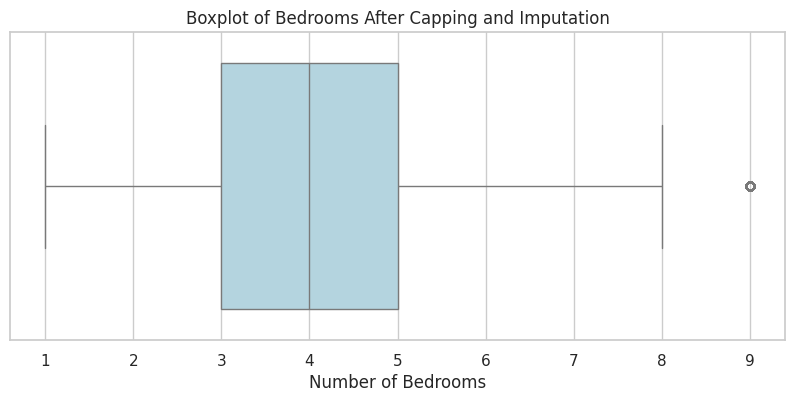

In [676]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Summary Statistics ---
print("Updated Bedrooms Summary:\n")
print(df['Bedrooms'].describe())

# --- Step 2: Boxplot (After Capping and Imputation) ---
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Bedrooms'], color='lightblue')
plt.title("Boxplot of Bedrooms After Capping and Imputation")
plt.xlabel("Number of Bedrooms")
plt.show()




In [677]:
df['Bedrooms'] = df['Bedrooms'].astype(int)

# **Cleaning: Bathrooms Column**

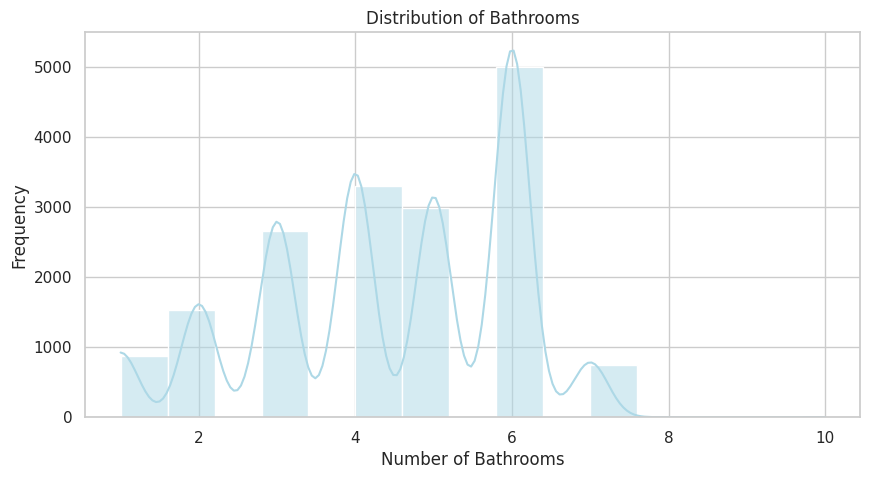

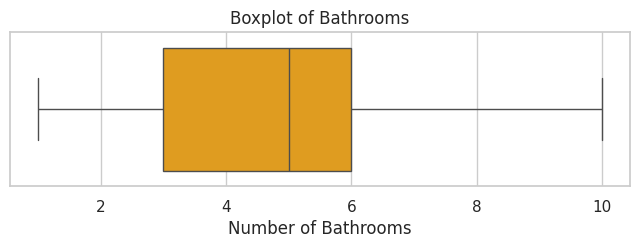

Skewness of Bathrooms: -0.41
Approximately Normal → Use Mean or Median

Outliers in 'Bathrooms':
Empty DataFrame
Columns: [Bathrooms]
Index: []

Count of outliers in 'Bathrooms': 0


In [678]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# --- Step 1: Ensure Correct Data Type ---
# Convert 'Bathrooms' to numeric (in case it was object/string)
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'], errors='coerce')

# --- Step 2: Visualize Distribution - Histogram ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Bathrooms"].dropna(), bins=15, kde=True, color='lightblue')
plt.title("Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Step 3: Visualize Outliers - Boxplot ---
plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Bathrooms"].dropna(), color='orange')
plt.title("Boxplot of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.show()

# --- Step 4: Skewness Check ---
# Compute skewness to guide imputation strategy
bathroom_skew = skew(df["Bathrooms"].dropna())
print(f"Skewness of Bathrooms: {bathroom_skew:.2f}")

# --- Step 5: Interpret Skewness ---
# Help decide whether to use mean or median for filling missing values
if bathroom_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif bathroom_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")

# --- Step 6: Impute Missing Values ---
# Based on skewness (typically real estate is skewed), use median
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())

# --- Step 7: Detect Outliers using IQR Method ---
def detect_outliers_iqr(data, column_name):
    """
    Detects outliers using the IQR method.
    Returns and prints outliers in the specified numeric column.
    """
    Q1 = data[column_name].quantile(0.25)  # 25th percentile
    Q3 = data[column_name].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                          # Interquartile range

    lower_bound = Q1 - 1.5 * IQR           # Lower outlier bound
    upper_bound = Q3 + 1.5 * IQR           # Upper outlier bound

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    print(f"\nOutliers in '{column_name}':")
    print(outliers[[column_name]])

    print(f"\nCount of outliers in '{column_name}': {outliers.shape[0]}")
    return outliers

# --- Step 8: Apply Outlier Detection to 'Bathrooms' ---
bathroom_outliers = detect_outliers_iqr(df, 'Bathrooms')


**Check Mean and Median**


In [679]:
# Mean (average)
mean_value = df['Bathrooms'].mean()
print(f"Mean: {mean_value}")

# Median (middle value)
median_value = df['Bathrooms'].median()
print(f"Median: {median_value}")


Mean: 4.439550807997809
Median: 5.0


This indicates a slightly left-skewed distribution, but still within the normal range (between -1 and +1).

So it’s approximately normal —  imputation choice of mean or median is valid.



In [680]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean())

No Outliers Detected
Your IQR method found zero outliers in the Bathrooms column.

That means there are no extreme or suspicious values, and no further action (like capping or removing) is needed.

In [681]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

# **Analyzing and Imputing Missing Values in Parking Spaces Column**

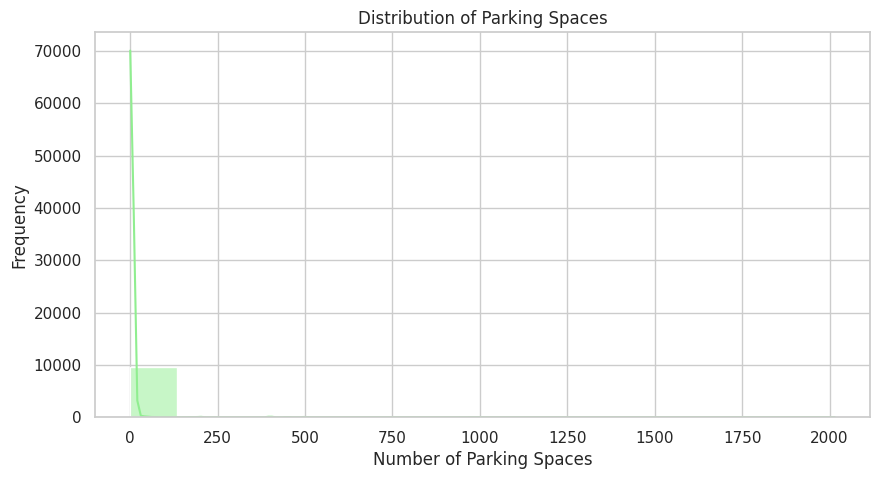

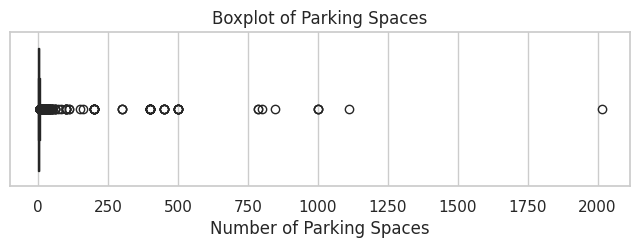

Skewness of Parking Spaces: 23.82
Highly Right-Skewed → Use Median for imputation


In [682]:
# Import necessary libraries for visualization and statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# Ensure 'Parking Spaces' column is numeric; convert any non-numeric values to NaN
df['Parking Spaces'] = pd.to_numeric(df['Parking Spaces'], errors='coerce')

# Plotting the histogram to visualize the distribution of Parking Spaces
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df["Parking Spaces"].dropna(), bins=15, kde=True, color='lightgreen')  # Histogram with KDE curve
plt.title("Distribution of Parking Spaces")
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to detect outliers in the 'Parking Spaces' column
plt.figure(figsize=(8, 2))  # Horizontal boxplot
sns.boxplot(x=df["Parking Spaces"].dropna(), color='green')
plt.title("Boxplot of Parking Spaces")
plt.xlabel("Number of Parking Spaces")
plt.show()

# Calculate skewness to determine the distribution shape
parking_skew = skew(df["Parking Spaces"].dropna())
print(f"Skewness of Parking Spaces: {parking_skew:.2f}")

# Suggest imputation strategy based on skewness
if parking_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif parking_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")



**Check Median**

In [683]:
# Mean (average)
mean_value = df['Parking Spaces'].mean()
print(f"Mean: {mean_value}")

# Median (middle value)
median_value = df['Parking Spaces'].median()
print(f"Median: {median_value}")

Mean: 5.251833057166528
Median: 2.0


# **Impute missing values with the median**

In [684]:
median_value = df['Parking Spaces'].median()
df['Parking Spaces'] = df['Parking Spaces'].fillna(median_value)

# **Unique Vlaues in Parking Space**

In [685]:
# Show top unique values of Parking Spaces
print("Top 25 unique values in Parking Spaces:")
print(df['Parking Spaces'].dropna().sort_values(ascending=False).unique()[:40])

Top 25 unique values in Parking Spaces:
[2015. 1111. 1000.  846.  800.  786.  500.  450.  400.  300.  200.  160.
  150.  111.  100.   80.   70.   60.   50.   45.   40.   32.   30.   25.
   23.   22.   20.   19.   18.   17.   16.   15.   13.   12.   10.    9.
    8.    7.    6.    5.]


# **Value counts**

In [686]:
print(df['Parking Spaces'].value_counts().sort_index())


Parking Spaces
0.0          12
1.0        3577
1.2           1
1.5           1
2.0       11439
3.0        1182
4.0        1131
5.0         279
6.0         214
7.0          34
8.0         103
9.0          15
10.0         85
12.0         13
13.0          1
15.0         21
16.0          4
17.0          1
18.0          3
19.0          1
20.0         34
22.0          1
23.0          2
25.0          6
30.0          6
32.0          2
40.0         13
45.0          2
50.0          6
60.0          4
70.0          1
80.0          1
100.0         6
111.0         2
150.0         1
160.0         1
200.0        10
300.0         3
400.0        15
450.0         6
500.0         7
786.0         2
800.0         1
846.0         1
1000.0        3
1111.0        1
2015.0        1
Name: count, dtype: int64


# **Outlier Detection Method IQR**

In [687]:
# Ensure column is numeric
df['Parking Spaces'] = pd.to_numeric(df['Parking Spaces'], errors='coerce')

# Drop missing values for quartile calculation
parking_clean = df['Parking Spaces'].dropna()

# Calculate Q1, Q2 (median), and Q3
Q1 = parking_clean.quantile(0.25)
Q2 = parking_clean.quantile(0.50)  # This is the median
Q3 = parking_clean.quantile(0.75)

# Print the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median / 50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")


Q1 (25th percentile): 2.0
Q2 (Median / 50th percentile): 2.0
Q3 (75th percentile): 2.0


In [567]:
# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print all values
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


IQR (Q3 - Q1): 0.0
Lower Bound: 2.0
Upper Bound: 2.0


**Note on IQR Outlier Detection for Parking Spaces**:
While attempting to detect outliers in the Parking Spaces column using the Interquartile Range (IQR) method, we observed that both Q1 and Q3 were equal to 2.0, resulting in an IQR of 0. This caused the lower and upper bounds to also be 2.0, meaning that any value not exactly equal to 2.0 was flagged as an outlier—even commonly occurring values like 1, 3, or 4. This is not a true reflection of unusual data but rather a limitation of the IQR method when the middle 50% of the data lacks variability. Therefore, in this case, IQR was not a suitable method for outlier detection. Instead, we relied on domain knowledge and applied a logical capping strategy to handle extreme values (e.g., capping values above 10).

In [688]:
# See how many rows have Parking Spaces > 10
df[df['Parking Spaces'] > 10][['City', 'Type', 'Price', 'Parking Spaces','Purpose','Description']]

,City,Type,Price,Parking Spaces,Purpose,Description
54,Karachi,House,76000000.0,200.0,For Sale,Don't miss the opportunity of owning your home...
238,Karachi,House,45500000.0,15.0,For Sale,NORTH NAZIMABAD BL. H G+2 BUNGALOW AVAILABLE F...
265,Karachi,Flat,17000000.0,100.0,For Sale,"Flat for Sale Block 17, Gulistan-e-Jauhar (3rd..."
354,Karachi,House,115000000.0,2015.0,For Sale,NaN
528,Karachi,House,95000000.0,20.0,For Sale,Property Details:\n. Location: khayaban-e-Badb...
...,...,...,...,...,...,...
17373,Lahore,Farm House,35000.0,20.0,For,8 Kanal Farmhouse for on Bedian Road\n\n- Ame...
17419,Lahore,House,1500000.0,20.0,For,17 Bedroom With Attached Washroom \n\n2 Tv Lou...
17450,Lahore,Flat,27000.0,20.0,For,We have the best options for Flat available at...
17487,Lahore,Farm House,1000000.0,16.0,For,NaN


# **Cap Parking Spaces to 10**

In [692]:
# Cap extreme values in Parking Spaces to 10
df.loc[df['Parking Spaces'] > 10, 'Parking Spaces'] = 10

Convert the Parking Spaces column into integers

In [691]:
df['Parking Spaces'] = df['Parking Spaces'].astype(int)


# **Re-check Outliers**


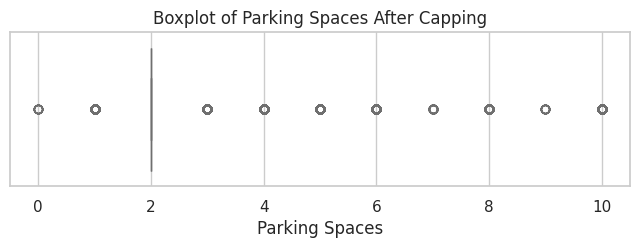

In [693]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Parking Spaces"], color='skyblue')
plt.title("Boxplot of Parking Spaces After Capping")
plt.show()





Values from 0 to 10 are present (✅ correct after capping).

However, many points are still marked as outliers, including:

0, 1, 3, 4, ..., even though these are normal in reality.
 Why does this happen?
Because  IQR = 0, as earlier:

Q1 = 2.0, Q3 = 2.0 → IQR = 0 → Lower & Upper bounds = 2.0
So anything ≠ 2.0 is considered an outlier, even if it's realistic

# **Impute and detect outliers in servant quarter column**

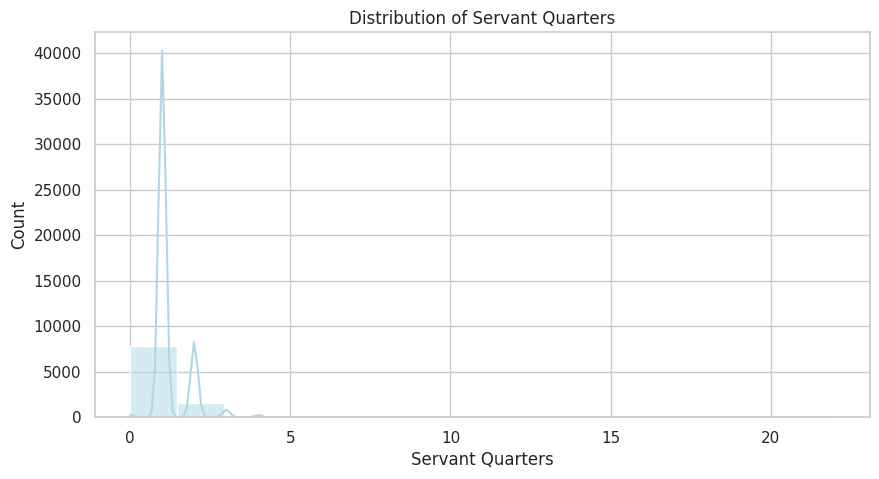

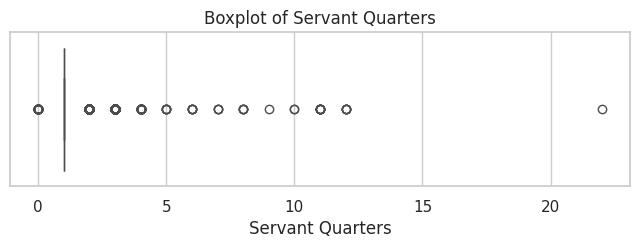

Skewness of Servant Quarters: 8.91

Outliers in Servant Quarters: 1883 rows


In [694]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Servant Quarters'].dropna(), bins=15, kde=True, color='lightblue')
plt.title("Distribution of Servant Quarters")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Servant Quarters'].dropna(), color='orange')
plt.title("Boxplot of Servant Quarters")
plt.show()

# Skewness
sq_skew = skew(df['Servant Quarters'].dropna())
print(f"Skewness of Servant Quarters: {sq_skew:.2f}")
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower) | (data[column_name] > upper)]
    print(f"\nOutliers in {column_name}: {outliers.shape[0]} rows")
    return outliers[[column_name]]

outliers_sq = detect_outliers_iqr(df, 'Servant Quarters')


# **Code to Impute**

In [695]:
# Fill missing Servant Quarters values with median
df['Servant Quarters'] = df['Servant Quarters'].fillna(df['Servant Quarters'].median())

# **Unique Vlaues in Servant Quarter**

In [696]:
# Show top unique values of Servant Quarter
print("Top 25 unique values in servant Quarters:")
print(df['Servant Quarters'].dropna().sort_values(ascending=False).unique()[:10])
print(df['Servant Quarters'].value_counts().sort_index())

Top 25 unique values in servant Quarters:
[22. 12. 11. 10.  9.  8.  7.  6.  5.  4.]
Servant Quarters
0.0        46
1.0     16372
2.0      1598
3.0       160
4.0        44
5.0         5
6.0         5
7.0         3
8.0         4
9.0         1
10.0        2
11.0        9
12.0        5
22.0        1
Name: count, dtype: int64


# **Cappping**

In [697]:
# Cap all values above 2
df['Servant Quarters'] = df['Servant Quarters'].clip(upper=2)

# **BoxPlot After Capping**

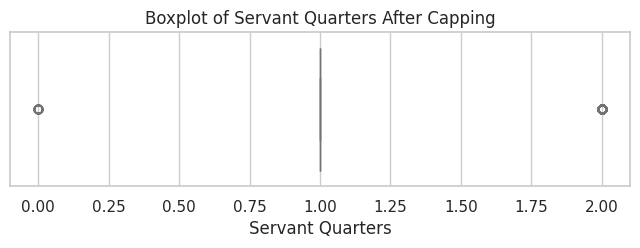

In [698]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Servant Quarters"], color='lightgreen')
plt.title("Boxplot of Servant Quarters After Capping")
plt.show()


In [699]:
# Step 2: (Optional) Convert to integer
df['Servant Quarters'] = df['Servant Quarters'].astype(int)


# **Analysis for Kitchens**

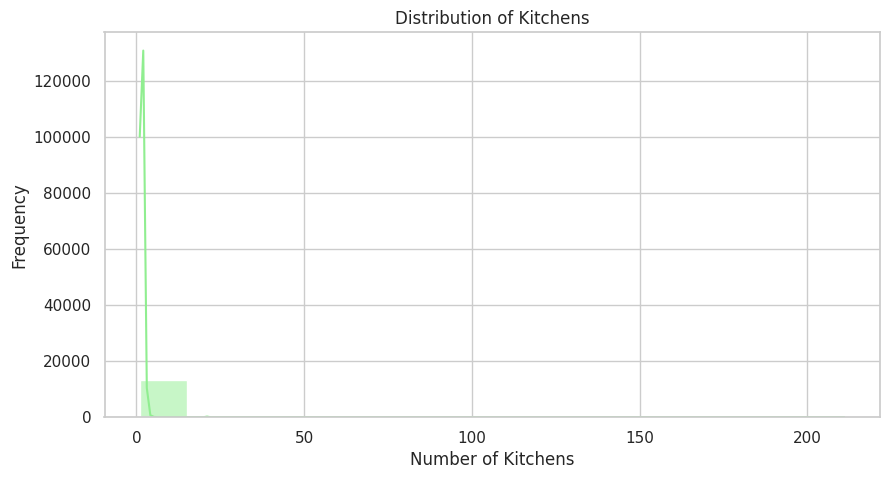

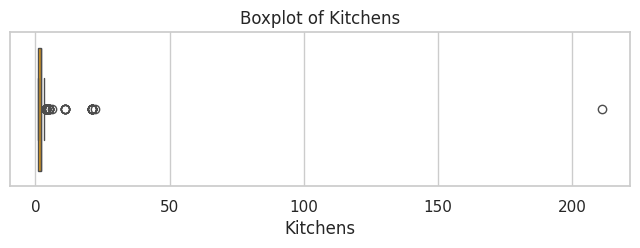

Skewness of Kitchens: 84.62
Highly Right-Skewed → Use Median for imputation

Outliers in 'Kitchens':
       Kitchens
3           4.0
420         4.0
508         4.0
532         4.0
544         4.0
...         ...
15651      11.0
15868     211.0
16562      11.0
16564      11.0
17487       4.0

[75 rows x 1 columns]

Count of outliers in 'Kitchens': 75


In [700]:
df['Kitchens'] = pd.to_numeric(df['Kitchens'], errors='coerce')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Kitchens"].dropna(), bins=15, kde=True, color='lightgreen')
plt.title("Distribution of Kitchens")
plt.xlabel("Number of Kitchens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Kitchens"].dropna(), color='orange')
plt.title("Boxplot of Kitchens")
plt.show()

# Skewness
kitchen_skew = skew(df["Kitchens"].dropna())
print(f"Skewness of Kitchens: {kitchen_skew:.2f}")

if kitchen_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif kitchen_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")

    #Detect outliers
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    print(f"\nOutliers in '{column_name}':")
    print(outliers[[column_name]])
    print(f"\nCount of outliers in '{column_name}': {outliers.shape[0]}")
    return outliers

# Detect outliers in Kitchens
kitchen_outliers = detect_outliers_iqr(df, 'Kitchens')


**# Impute Missing values with Median**

In [701]:
# Step 3: Fill missing values with the median
df['Kitchens'] = df['Kitchens'].fillna(df['Kitchens'].median())

**Unique Values in Kitchen**

In [702]:
# Show top unique values of Kitchens
print("Top 25 unique values in Kitchens:")
print(df['Kitchens'].dropna().sort_values(ascending=False).unique()[:20])
print(df['Kitchens'].value_counts().sort_index())

Top 25 unique values in Kitchens:
[211.  22.  21.  11.   6.   5.   4.   3.   2.   1.]
Kitchens
1.0       5394
2.0      12191
3.0        595
4.0         45
5.0          8
6.0          1
11.0         6
21.0        13
22.0         1
211.0        1
Name: count, dtype: int64


**Listings where Kitchens > 3**

In [581]:
# Show listings where Kitchens > 3
kitchen_outliers = df[df['Kitchens'] > 3][['Kitchens', 'Price', 'Area', 'Location', 'Type', 'Description']]
kitchen_outliers.head(10)  # Show top 10 entries



,Kitchens,Price,Area,Location,Type,Description
3,4.0,29800000.0,954.0,"DHA Defence, Karachi, Sindh",Flat,Chance Deal at HMR Waterfront 1-Bed Apartment ...
420,4.0,70000000.0,2304.0,"North Nazimabad, Karachi, Sindh",House,VERY WELL PLANNED \nGROUND PLUS 3 HOUSE \n Ava...
508,4.0,215000000.0,5400.0,"Gulshan-e-Iqbal Town, Karachi, Sindh",House,600 square yards house at the super hot locati...
532,4.0,150000000.0,4500.0,"DHA Defence, Karachi, Sindh",House,only buyer no agents\n\nBrand new banglow for ...
544,4.0,28800000.0,1080.0,"North Karachi, Karachi, Sindh",House,120 SQYARDS | GROUND +2 +2BED LOUNGE ON ROOF |...
581,4.0,95000000.0,3600.0,"Gulistan-e-Jauhar, Karachi, Sindh",House,400 SQ YARDS \nBRAND NEW HOUSE \n\nGROUND FLOO...
591,5.0,160000000.0,9000.0,"Federal B Area, Karachi, Sindh",House,Leased House \nMaintained House \n10 bedrooms ...
743,11.0,14000000.0,1098.0,"Jamshed Town, Karachi, Sindh",Flat,Discover modern comfort and convenience in thi...
1330,4.0,118000000.0,5445.0,"DHA Defence, Islamabad, Islamabad Capital",House,One of a kind Peace of land for Sale in Dha Ph...
1724,4.0,400000000.0,8712.0,"G-7, Islamabad, Islamabad Capital",House,Cda sector G-7/4(90*80)=800-Sq yards 8-bed roo...


# **Capping**

In [703]:
# Step 1: Cap values above 3 to 3
df['Kitchens'] = df['Kitchens'].clip(upper=3)

# Step 2: (Optional) Convert to integer
df['Kitchens'] = df['Kitchens'].astype(int)

# Step 3: Check value counts to verify
print("Value counts after capping:")
print(df['Kitchens'].value_counts())


Value counts after capping:
Kitchens
2    12191
1     5394
3      670
Name: count, dtype: int64


# **Boxplot After Capping**

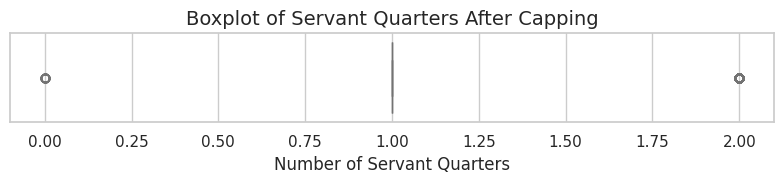

In [704]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Servant Quarters"], color='lightgreen')

# Add title and axis labels
plt.title("Boxplot of Servant Quarters After Capping", fontsize=14)
plt.xlabel("Number of Servant Quarters", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




# **Cleaning: Store Rooms**

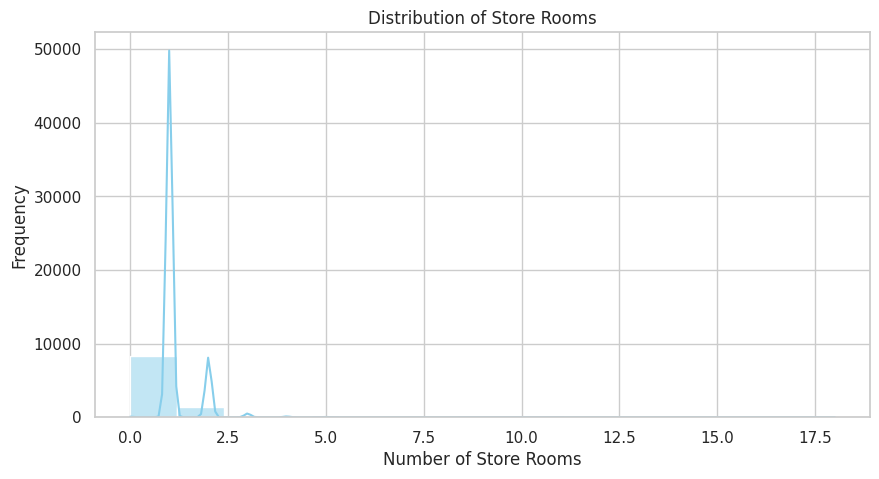

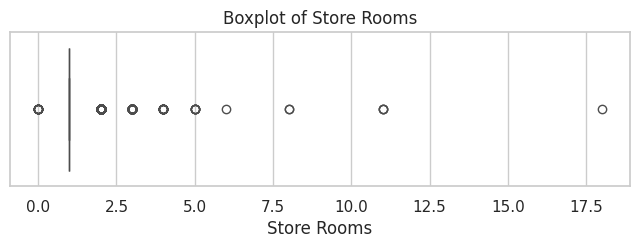

Skewness of Store Rooms: 8.73
Highly Right-Skewed → Use Median for imputation


In [705]:
df['Store Rooms'] = pd.to_numeric(df['Store Rooms'], errors='coerce')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# Step 1: Convert 'Store Rooms' to numeric (in case it's object or string)
df['Store Rooms'] = pd.to_numeric(df['Store Rooms'], errors='coerce')

# Step 2: Plot histogram to check distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Store Rooms"].dropna(), bins=15, kde=True, color='skyblue')
plt.title("Distribution of Store Rooms")
plt.xlabel("Number of Store Rooms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 3: Plot boxplot to visually check outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Store Rooms"].dropna(), color='orange')
plt.title("Boxplot of Store Rooms")
plt.show()

# Step 4: Check skewness to decide imputation method
store_skew = skew(df["Store Rooms"].dropna())
print(f"Skewness of Store Rooms: {store_skew:.2f}")

# Step 5: Suggest imputation strategy based on skewness
if store_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif store_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")


# **Impute With Median**

In [709]:
# Step 3: Fill missing values with the median
df['Store Rooms'] = df['Store Rooms'].fillna(df['Store Rooms'].median())

# **Detection of Outliers using IQR**

In [710]:
# Step 1: Calculate IQR boundaries for Store Rooms
Q1 = df['Store Rooms'].quantile(0.25)
Q3 = df['Store Rooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Filter extreme outliers (much higher than upper_bound)
extreme_outliers = df[df['Store Rooms'] > upper_bound]

# Step 3: Show important details of those extreme outliers
extreme_outliers = extreme_outliers[['City', 'Type', 'Price', 'Store Rooms']]
print("🔍 Extreme Outliers in Store Rooms:\n")
print(extreme_outliers.sort_values(by='Store Rooms', ascending=False).head(20))  # Top 20 largest


🔍 Extreme Outliers in Store Rooms:

             City           Type         Price  Store Rooms
4889       Multan          House  3.100000e+07         18.0
2378    Islamabad           Flat  8.250000e+06         11.0
9992   Gujranwala          House  1.950000e+07         11.0
13523  Islamabad   Lower Portion  4.200000e+05         11.0
5610   Rawalpindi          House  1.750000e+07          8.0
7848      Sialkot          House  2.150000e+07          8.0
12968  Islamabad           House  3.250000e+05          6.0
841       Karachi          House  3.950000e+08          5.0
8272       Lahore          House  4.600000e+07          5.0
17419     Lahore           House  1.500000e+06          5.0
14226     Multan      Farm House  5.500000e+05          5.0
546       Karachi          House  5.500000e+07          5.0
1691    Islamabad          House  1.360000e+09          5.0
6198     Peshawar          House  4.400000e+07          4.0
3038   Faisalabad          House  5.500000e+07          4.0
1748

**UNique Values**

In [711]:
# Show top unique values of Store Rooms
print("Top unique values in Store Rooms:")
print(df['Store Rooms'].dropna().sort_values(ascending=False).unique()[:20])

# Show count of each unique value (sorted)
print("\nValue counts in Store Rooms:")
print(df['Store Rooms'].value_counts().sort_index())


Top unique values in Store Rooms:
[18. 11.  8.  6.  5.  4.  3.  2.  1.  0.]

Value counts in Store Rooms:
Store Rooms
0.0        13
1.0     16779
2.0      1347
3.0        85
4.0        18
5.0         6
6.0         1
8.0         2
11.0        3
18.0        1
Name: count, dtype: int64


See how many rows have Store Rooms > 2

In [712]:
# See how many rows have Store Rooms > 2
df[df['Store Rooms'] > 2][['City', 'Type', 'Price', 'Store Rooms','Purpose','Title']]

,City,Type,Price,Store Rooms,Purpose,Title
223,Karachi,House,169900000.0,3.0,For Sale,Like Brand 666 Yard Fully RENOVATED Bungalow F...
454,Karachi,House,370000000.0,3.0,For Sale,House Available For sale In DHA Phase 8
472,Karachi,House,60000000.0,3.0,For Sale,280 Square Yards Triple Storey Corner Banglow ...
511,Karachi,House,850000000.0,3.0,For Sale,One Of A Kind 2000 Yards BRAND NEW Ultra Moder...
541,Karachi,House,65000000.0,3.0,For Sale,GROUND+2 | 240 SQYARDS | 3BED DD PLANNING | FU...
...,...,...,...,...,...,...
16856,Lahore,House,130000.0,3.0,For,10-Marla 04 Bedroom House Available For In As...
17419,Lahore,House,1500000.0,5.0,For,4 Kanal Commercial House Is Available For . Be...
17487,Lahore,Farm House,1000000.0,4.0,For,Bedian Road 4 Kanal Farm House 7 Beds Near Pha...
17511,Lahore,House,200000.0,4.0,For,Elegant 1 Kanal House For In DHA Phase 2 Prim...


# **Capping**

In [713]:
# Cap 'Store Rooms' values at 3
df['Store Rooms'] = df['Store Rooms'].clip(upper=3)
# Step 3: Convert to integer type
df['Store Rooms'] = df['Store Rooms'].astype(int)

# Confirm capping by viewing unique values again
print("Unique values after capping:")
print(df['Store Rooms'].value_counts().sort_index())
print("\nData type:", df['Store Rooms'].dtype)



Unique values after capping:
Store Rooms
0       13
1    16779
2     1347
3      116
Name: count, dtype: int64

Data type: int64


# **Drop Built in year**

In [714]:
df.drop(columns=['Built in year'], inplace=True)

# **Handling Missing Values in Type (Property Type)**

# **Value counts**

In [715]:
# Step 1: Check number of missing values
missing_count = df['Type'].isnull().sum()
print(f"Missing values in 'Type': {missing_count}")

# Step 2: View unique types and their frequencies
print("\nValue counts in 'Type':")
print(df['Type'].value_counts(dropna=False))  # dropna=False includes NaN in the count


Missing values in 'Type': 16

Value counts in 'Type':
Type
House            13386
Flat              2892
Upper Portion     1247
Lower Portion      560
Farm House          89
Room                43
Penthouse           22
NaN                 16
Name: count, dtype: int64


# **Check Mode**

In [716]:
# Check the mode of the 'Type' column
type_mode = df['Type'].mode()[0]
print("Mode of 'Type' column:", type_mode)


Mode of 'Type' column: House


# **Impute with Mode**

In [717]:
# Impute missing values in 'Type' column using the most frequent category (mode)
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

# **Handling Missing Values in Purpose**

# **Value Count**

In [718]:
# Check missing values and value counts for 'Purpose'
print("Missing values in 'Purpose':", df['Purpose'].isnull().sum())

print("\nValue counts in 'Purpose':")
print(df['Purpose'].value_counts())


Missing values in 'Purpose': 16

Value counts in 'Purpose':
Purpose
For Sale    11126
For          7113
Name: count, dtype: int64


# **Replace Missing Value with Mode**

In [719]:
# Step 1: Find the mode of the 'Purpose' column
purpose_mode = df['Purpose'].mode()[0]

# Step 2: Replace 'unknown' and NaN with mode
df['Purpose'] = df['Purpose'].replace('unknown', purpose_mode)
df['Purpose'] = df['Purpose'].fillna(purpose_mode)

# Step 3: Confirm the change
print(df['Purpose'].value_counts())

Purpose
For Sale    11142
For          7113
Name: count, dtype: int64


# **Handle missing Values in location**

In [720]:
df['Location'] = df['Location'].fillna('Unknown') #→ Fill them with "Unknown"

# **Drop Title and URL:**


In [721]:
# Drop only if the columns exist
df.drop(columns=[col for col in ['Title', 'URL'] if col in df.columns], inplace=True)



# **Missing Value in Price**

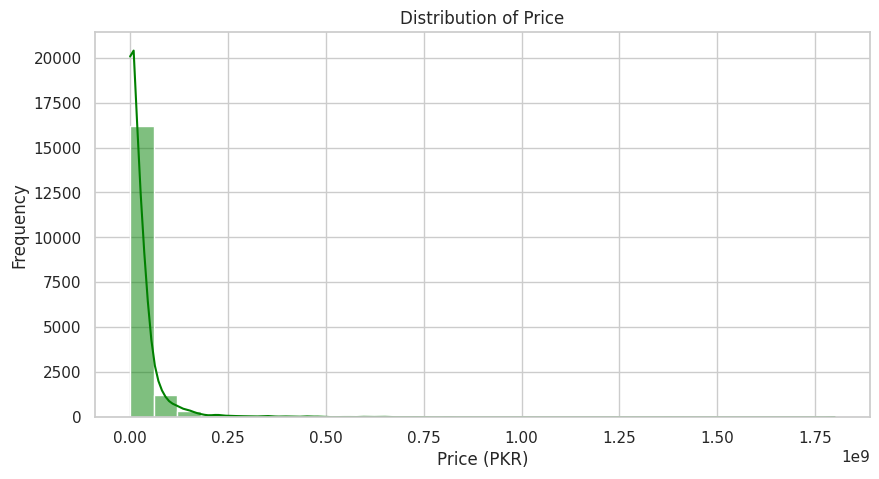

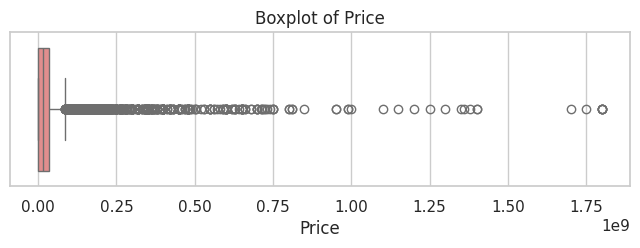

Skewness of Price: 10.25
Highly Right-Skewed → Use Median for imputation


In [722]:
# Import necessary libraries for visualization and statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# Ensure 'Price' column is numeric; convert any non-numeric values to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Plotting the histogram to visualize the distribution of Price
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df["Price"].dropna(), bins=30, kde=True, color='green')  # Histogram with KDE curve
plt.title("Distribution of Price")
plt.xlabel("Price (PKR)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to detect outliers in the 'Price' column
plt.figure(figsize=(8, 2))  # Horizontal boxplot
sns.boxplot(x=df["Price"].dropna(), color='lightcoral')
plt.title("Boxplot of Price")
plt.show()

# Calculate skewness to determine the distribution shape
price_skew = skew(df["Price"].dropna())
print(f"Skewness of Price: {price_skew:.2f}")

# Suggest imputation strategy based on skewness
if price_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif price_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")


In [723]:
print(df[['Price', 'Type', 'Area', 'Location']].sort_values(by='Price').head(10))  # lowest prices
print(df[['Price', 'Type', 'Area', 'Location']].sort_values(by='Price', ascending=False).head(10))  # highest prices


         Price           Type      Area  \
13959   6000.0           Room   353.925   
16131   6500.0           Room   108.900   
16138   6500.0           Room   108.900   
16130   6500.0           Room   108.900   
14675   8000.0           Flat   217.800   
15671   8000.0           Flat   353.925   
14003  10000.0  Upper Portion   816.750   
18017  11000.0           Flat   816.750   
13273  11000.0           Flat   435.600   
18209  11900.0           Room  5445.000   

                                                Location  
13959                    Muslim Town, Faisalabad, Punjab  
16131  Sunehri Masjid Road, Peshawar, Khyber Pakhtunkhwa  
16138               Saddar, Peshawar, Khyber Pakhtunkhwa  
16130  Sunehri Masjid Road, Peshawar, Khyber Pakhtunkhwa  
14675         Bahria Town Rawalpindi, Rawalpindi, Punjab  
15671           Citi Housing Society, Gujranwala, Punjab  
14003                    Muslim Town, Faisalabad, Punjab  
18017              Citi Housing Society, Sialkot, Punj

# **Impute With median**

In [724]:
# Step 3: Fill missing values with the median
df['Price'] = df['Price'].fillna(df['Price'].median())


In [725]:
# Find listings with price equal to 1.8 billion PKR
expensive_listings = df[df['Price'] == 1800000000.0]

# Display the relevant details: Price, Type, Area, and Location
print(expensive_listings[['Price', 'Type', 'Area', 'Location', 'Description']])


             Price   Type     Area                           Location  \
1520  1.800000e+09  House  21780.0  F-7, Islamabad, Islamabad Capital   
1671  1.800000e+09  House  25047.0  F-6, Islamabad, Islamabad Capital   
1672  1.800000e+09  House  21780.0  F-7, Islamabad, Islamabad Capital   
1695  1.800000e+09  House  13612.5  F-7, Islamabad, Islamabad Capital   
1696  1.800000e+09  House  13612.5  E-7, Islamabad, Islamabad Capital   

                                            Description  
1520  Marriott Estate And Builders Offer a Ideal Hou...  
1671  Marriott Estate And Builders Offer a Ideal Hou...  
1672  Marriott Estate And Builders Offer a Ideal Hou...  
1695  Marriott Estate And Builders Offers A Ideal Ho...  
1696  Marriott Estate And Builders Offer a Ideal Hou...  


Based on manual inspection of the lowest and highest property prices, no invalid outliers were found. Low-price listings (e.g., PKR 6,000–10,000) correspond to small rooms or rental units, while high-price listings (up to PKR 1.8 billion) reflect large luxury properties in elite areas like F-6 and F-7 Islamabad. Therefore, no capping or removal of price outliers was performed as they appear valid within the real estate market context.

# **Missing Value in Area**

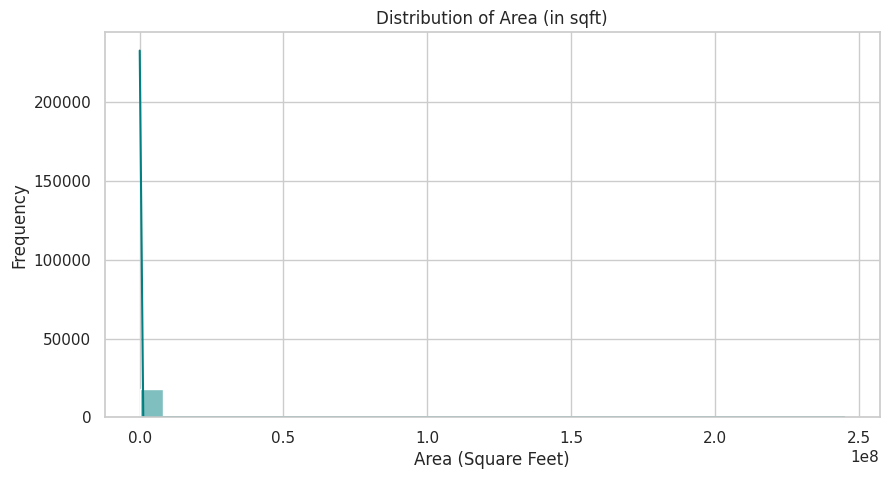

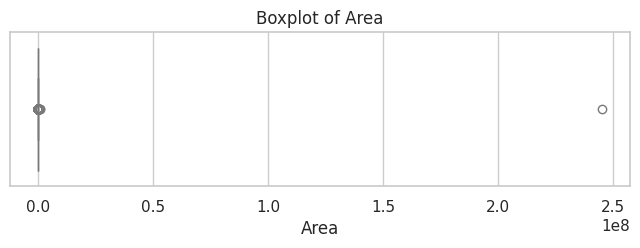

Skewness of Area: 135.01
Highly Right-Skewed → Use Median for imputation


In [726]:
# Import necessary libraries for visualization and statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pandas as pd

# Ensure 'Area' column is numeric; convert any non-numeric values to NaN
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Plotting the histogram to visualize the distribution of Area
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df["Area"].dropna(), bins=30, kde=True, color='teal')  # Histogram with KDE curve
plt.title("Distribution of Area (in sqft)")
plt.xlabel("Area (Square Feet)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplot to detect outliers in the 'Area' column
plt.figure(figsize=(8, 2))  # Horizontal boxplot
sns.boxplot(x=df["Area"].dropna(), color='lightblue')
plt.title("Boxplot of Area")
plt.show()

# Calculate skewness to determine the distribution shape
area_skew = skew(df["Area"].dropna())
print(f"Skewness of Area: {area_skew:.2f}")

# Suggest imputation strategy based on skewness
if area_skew > 1:
    print("Highly Right-Skewed → Use Median for imputation")
elif area_skew < -1:
    print("Highly Left-Skewed → Use Median for imputation")
else:
    print("Approximately Normal → Use Mean or Median")


In [727]:
import pandas as pd

# Step 1: Load your data (assuming it's already in a DataFrame called df)
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')  # ensure it's numeric

# Step 2: Calculate IQR
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Step 4: Find outliers
outliers = df[(df['Area'] > upper_bound) | (df['Area'] < lower_bound)]

# Step 5: Count them
outlier_count = outliers.shape[0]
print("Number of outliers based on Area:", outlier_count)


import pandas as pd

# Sample data (replace this with your actual dataset loading)
# df = pd.read_csv("your_file.csv") or pd.read_excel("your_file.xlsx")

# Ensure Area column is numeric
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Step 1: Calculate IQR
Q1 = df['Area'].quantile(0.25)
Q3 = df['Area'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers = df[(df['Area'] > upper_bound) | (df['Area'] < lower_bound)]

# Step 4: Show outliers
print("Outliers in Area column:")
print(outliers[[ 'Area', 'Type', 'Location', 'Description']])


Number of outliers based on Area: 1085
Outliers in Area column:
          Area   Type                                           Location  \
39      9000.0  House                        DHA Defence, Karachi, Sindh   
45      9000.0  House                        DHA Defence, Karachi, Sindh   
46      9000.0  House                        DHA Defence, Karachi, Sindh   
75      9000.0  House                        DHA Defence, Karachi, Sindh   
82      9072.0  House                            Zamzama, Karachi, Sindh   
...        ...    ...                                                ...   
18141   8167.5  House                    DHA Defence, Bahawalpur, Punjab   
18150  10890.0  House                   Model Town A, Bahawalpur, Punjab   
18155   6534.0  House                   Model Town A, Bahawalpur, Punjab   
18157  10890.0  House                   Model Town A, Bahawalpur, Punjab   
18239   9801.0  House  Sadiqabad to Rahim Yar Khan Road, Rahim Yar Kh...   

                       

# **Using Median**

In [728]:
# Step 3: Fill missing values with the median
df['Price'] = df['Price'].fillna(df['Price'].median())

# **Maximum and Minimum Area**

In [729]:
# Ensure Area is numeric
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Check min and max
min_area = df['Area'].min()
max_area = df['Area'].max()

print(f"Minimum Area: {min_area} sqft")
print(f"Maximum Area: {max_area} sqft")


Minimum Area: 27.225 sqft
Maximum Area: 245025000.0 sqft


# **Outlier Handling Approach:**
In this analysis, we did not remove all statistical outliers identified using the IQR (Interquartile Range) method. Instead, we carefully filtered and removed only those suspicious outliers that were extremely large in area and located in regular residential zones where such property sizes are highly unlikely. For example, certain entries with area values exceeding 1,000,000 square feet were removed only if they were not labeled as farmhouses, agricultural land, or orchard schemes. This selective approach ensures that genuine high-value properties, such as large farmhouses or estates, are retained for accurate analysis, while clear anomalies or potential data entry errors are excluded.

In [730]:
# Drop only suspicious ones, like extremely high area in regular cities
suspicious_outliers = outliers[
    (outliers['Area'] > 1_000_000) &
    (~outliers['Location'].str.contains("Farm|Agric|Orchard", case=False, na=False))
]


In [731]:
print(suspicious_outliers[['Area', 'Type', 'Location', 'Description']])


              Area   Type                    Location Description
17314  245025000.0  House  LDA Avenue, Lahore, Punjab         NaN


In [732]:
print("Number of suspicious outliers removed:", suspicious_outliers.shape[0])


Number of suspicious outliers removed: 1


In [733]:
print("Indexes of removed outliers:", suspicious_outliers.index.tolist())


Indexes of removed outliers: [17314]


In [734]:
# Display remaining column names after cleaning
print("Remaining columns after cleaning:")
print(df.columns.tolist())
# View first 5 rows of the cleaned DataFrame
df.head()

Remaining columns after cleaning:
['City', 'Type', 'Area', 'Price', 'Purpose', 'Location', 'Description', 'Parking Spaces', 'Bedrooms', 'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms']


,City,Type,Area,Price,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms
0,Karachi,Flat,1152.0,47500000.0,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,2,2,2,1,2,1
1,Karachi,Flat,1449.0,62500000.0,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,2,2,3,1,1,1
2,Karachi,Flat,999.0,34500000.0,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,2,1,2,1,2,1
3,Karachi,Flat,954.0,29800000.0,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,1,1,2,1,3,1
4,Karachi,Flat,1404.0,46500000.0,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,2,2,2,1,2,1


In [735]:
print(df.dtypes)

City                 object
Type                 object
Area                float64
Price               float64
Purpose              object
Location             object
Description          object
Parking Spaces        int64
Bedrooms              int64
Bathrooms             int64
Servant Quarters      int64
Kitchens              int64
Store Rooms           int64
dtype: object


# **Repalce Missing Value in Description with Unknown**

In [736]:
# Fill missing values in 'Description' with 'Unknown'
df['Description'] = df['Description'].fillna("Unknown")

# **Clean and standardizes the city names in the DataFrame column**

# **Install Fuzzy Wuzzy**

In [737]:
!pip install fuzzywuzzy python-Levenshtein




# **Unique Cities**

In [738]:
unique_cities = df['City'].unique()
print(unique_cities)


['Karachi' 'Islamabad' 'Faisalabad' 'Multan' 'Rawalpindi' 'Peshawar'
 'Jhelum' 'Murree' 'Hyderabad' 'Bahawalpur' 'Sialkot' 'Abbottabad'
 'Sahiwal' 'Lahore' 'Gujrat' 'Wah' 'Sargodha' 'Sheikhupura' 'Chakwal'
 'Naran' 'Nowshera' 'Mardan' 'Chilas' 'Sarai Alamgir' 'Quetta'
 'Rahim Yar Khan' 'Okara' 'Attock' 'Dera Ghazi Khan' 'Taxila' 'Sukkur'
 'Gwadar' 'Kasur' 'Mirpur' 'Haripur' 'Gujar Khan' 'Gharo' 'Mirpur Khas'
 'Swat' 'Daska' 'Sadiqabad' 'Buner' 'Jhang' 'Lalamusa' 'Lodhran'
 'Pakpattan' 'Chiniot' 'Dera Ismail Khan' 'Fateh Jang' 'Burewala'
 'Hafizabad' 'Talagang' 'Vehari' 'Jamshoro' 'Galyat' 'Gujranwala'
 'Kharian' 'Karachi ' 'Islamabad ' 'Faisalabad ' 'Multan ' 'Rawalpindi '
 'Gujranwala ' 'Peshawar ' 'Lahore ' 'Jhelum ' 'Hyderabad ' 'Sialkot  '
 'Murree ' 'Bahawalpur ' 'Abbottabad ' 'Wah ' 'Gujrat ' 'Sahiwal '
 'Sheikhupura ' 'Sargodha ' 'Rahim Yar Khan ' 'Taxila ' 'Mardan '
 'Sarai Alamgir ' 'Nowshera ' 'Okara ' 'Attock ' 'Dera Ghazi Khan ']


In [739]:
from fuzzywuzzy import process

# List of official, clean city names to match against
clean_cities = [
    'Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi', 'Peshawar',
    'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur', 'Sialkot', 'Abbottabad',
    'Sahiwal', 'Lahore', 'Gujrat', 'Wah', 'Sargodha', 'Sheikhupura', 'Chakwal',
    'Naran', 'Nowshera', 'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta',
    'Rahim Yar Khan', 'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur',
    'Gwadar', 'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
    'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa', 'Lodhran',
    'Pakpattan', 'Chiniot', 'Dera Ismail Khan', 'Fateh Jang', 'Burewala',
    'Hafizabad', 'Talagang', 'Vehari', 'Jamshoro', 'Galyat', 'Gujranwala',
    'Kharian'
]

def fuzzy_city_correct(city, choices, threshold=85):
    """
    Function to clean a city name using fuzzy matching.

    Args:
        city (str): The city name to clean.
        choices (list): List of clean city names to match against.
        threshold (int): Minimum matching score required to accept a match.

    Returns:
        str: The cleaned city name if matched, otherwise original city.
    """
    if not isinstance(city, str):
        # If the input is not a string (e.g. NaN), return as is
        return city

    # Remove leading and trailing spaces from the city name
    city = city.strip()

    # Use fuzzy matching to find the closest match from the clean city list
    match, score = process.extractOne(city, choices)

    # If the matching score is above the threshold, return the matched city
    if score >= threshold:
        return match
    else:
        # Otherwise, return the original city name unchanged
        return city

# Apply the cleaning function directly to the 'city' column
# This overwrites the original 'city' values with the cleaned versions
df['City'] = df['City'].apply(lambda x: fuzzy_city_correct(x, clean_cities))

# Display the unique cleaned city names after processing
print(df['City'].unique())


['Karachi' 'Islamabad' 'Faisalabad' 'Multan' 'Rawalpindi' 'Peshawar'
 'Jhelum' 'Murree' 'Hyderabad' 'Bahawalpur' 'Sialkot' 'Abbottabad'
 'Sahiwal' 'Lahore' 'Gujrat' 'Wah' 'Sargodha' 'Sheikhupura' 'Chakwal'
 'Naran' 'Nowshera' 'Mardan' 'Chilas' 'Sarai Alamgir' 'Quetta'
 'Rahim Yar Khan' 'Okara' 'Attock' 'Dera Ghazi Khan' 'Taxila' 'Sukkur'
 'Gwadar' 'Kasur' 'Mirpur' 'Haripur' 'Gujar Khan' 'Gharo' 'Mirpur Khas'
 'Swat' 'Daska' 'Sadiqabad' 'Buner' 'Jhang' 'Lalamusa' 'Lodhran'
 'Pakpattan' 'Chiniot' 'Dera Ismail Khan' 'Fateh Jang' 'Burewala'
 'Hafizabad' 'Talagang' 'Vehari' 'Jamshoro' 'Galyat' 'Gujranwala'
 'Kharian']


# **Check unique property types in your data**

In [740]:
print(df['Type'].unique())
df['Type'] = df['Type'].str.strip().str.title()
print(sorted(df['Type'].unique()))

['Flat' 'House' 'Upper Portion' 'Lower Portion' 'Penthouse' 'Farm House'
 'Room']
['Farm House', 'Flat', 'House', 'Lower Portion', 'Penthouse', 'Room', 'Upper Portion']


# **Check Purpose in your data**(Remove Inconsistent)

In [741]:
print(df['Purpose'].unique())

['For Sale' 'For ']


While reviewing the Purpose column, we observed that entries labeled simply as 'For' or 'For ' were often associated with significantly lower property prices. This pattern strongly indicated that these listings were intended for rent, not sale. To reflect this and ensure consistency in the dataset, we replaced such entries with 'Rent'. This step helps distinguish between rental and sale listings accurately, which is crucial for reliable pricing and market trend analysis.

In [742]:
# Step 1: Standardize formatting
df['Purpose'] = df['Purpose'].str.strip().str.title()  # Removes extra spaces, ensures title case

# Step 2: Replace values
df['Purpose'] = df['Purpose'].replace({
    'For Sale': 'Sale',
    'For Rent': 'Rent',
    'For': 'Rent',        # in case 'For' still exists
    'For ': 'Rent',       # just to be extra safe
})

# Optional: Check final values
print(df['Purpose'].unique())


['Sale' 'Rent']


# **Feature Engineering: Additional Calculated Columns**

o enhance the analytical value of the dataset, we performed feature engineering by creating three new columns. First, we introduced Size_Marla by converting the Area from square feet to marla (1 marla = 272.25 sq ft), which is a more locally meaningful unit for property size in Pakistan. Next, we calculated Price_per_sqft by dividing the total property Price by its Area, helping identify properties that may be over- or under-valued on a per square foot basis. Lastly, we created Price_per_marla by dividing Price by Size_Marla, providing a normalized cost metric for comparison across properties of different sizes. These derived features allow for deeper insights into market trends, pricing strategies, and property valuation.

In [743]:
import numpy as np
import pandas as pd

# 1. Ensure correct types
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 2. Basic derived metrics (already in your dataset, but re-checking)
df['Price_per_sqft'] = df['Price'] / df['Area']
df['Size_Marla'] = df['Area'] / 272.25
df['Price_per_marla'] = df['Price'] / df['Size_Marla']


# 4. Binning for Sale
sale_bins = [0, 5_000_000, 15_000_000, 50_000_000, np.inf]
sale_labels = ['Budget', 'Mid-Range', 'High-End', 'Luxury']
df['Sale_Price_Bin'] = pd.cut(df['Price'], bins=sale_bins, labels=sale_labels)
df['Sale_Price_Bin'] = df['Sale_Price_Bin'].where(df['Purpose'] == 'Sale')

# 5. Binning for Rent
rent_bins = [0, 20000, 50000, 100000, np.inf]
rent_labels = ['Low Rent', 'Moderate', 'High', 'Premium Rent']
df['Rent_Price_Bin'] = pd.cut(df['Price'], bins=rent_bins, labels=rent_labels)
df['Rent_Price_Bin'] = df['Rent_Price_Bin'].where(df['Purpose'] == 'Rent')

# 6. Unified Price Bin
df['Price_Bin'] = df['Sale_Price_Bin'].combine_first(df['Rent_Price_Bin'])





# Optional: Clean Property Type for grouping
df['Type'] = df['Type'].str.strip().str.lower().str.title()


    # Create Total_Rooms by summing all relevant columns, handling missing values
df['Total_Rooms'] = (
    df[['Bedrooms', 'Bathrooms', 'Kitchens', 'Store Rooms', 'Servant Quarters']]
    .apply(pd.to_numeric, errors='coerce')  # convert to numeric in case of strings
    .fillna(0)
    .sum(axis=1)
)

df

,City,Type,Area,Price,Purpose,Location,Description,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,Price_per_sqft,Size_Marla,Price_per_marla,Sale_Price_Bin,Rent_Price_Bin,Price_Bin,Total_Rooms
0,Karachi,Flat,1152.0,47500000.0,Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,2,2,2,1,2,1,41232.638889,4.231405,1.122559e+07,High-End,NaN,High-End,8
1,Karachi,Flat,1449.0,62500000.0,Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,2,2,3,1,1,1,43133.195307,5.322314,1.174301e+07,Luxury,NaN,Luxury,8
2,Karachi,Flat,999.0,34500000.0,Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,2,1,2,1,2,1,34534.534535,3.669421,9.402027e+06,High-End,NaN,High-End,7
3,Karachi,Flat,954.0,29800000.0,Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,1,1,2,1,3,1,31236.897275,3.504132,8.504245e+06,High-End,NaN,High-End,8
4,Karachi,Flat,1404.0,46500000.0,Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,2,2,2,1,2,1,33119.658120,5.157025,9.016827e+06,High-End,NaN,High-End,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,Nowshera,House,2722.5,40000.0,Rent,"Armour Colony, Nowshera, Khyber Pakhtunkhwa",Malik Real Estate and Builders Take your pick ...,1,5,5,1,2,1,14.692378,10.000000,4.000000e+03,NaN,Moderate,Moderate,14
18251,Okara,House,544.5,14000.0,Rent,"Shah Din Road, Okara, Punjab",Unknown,2,2,2,1,1,1,25.711662,2.000000,7.000000e+03,NaN,Low Rent,Low Rent,7
18252,Okara,House,2178.0,40000.0,Rent,"Umer Din Town, Okara, Punjab",8 Marla Single Story House Is Available For I...,3,3,3,1,2,1,18.365473,8.000000,5.000000e+03,NaN,Moderate,Moderate,10
18253,Attock,House,5445.0,100000.0,Rent,"Cantt, Attock, Punjab",Unknown,1,6,5,1,1,1,18.365473,20.000000,5.000000e+03,NaN,High,High,14


# **Remove Duplicates from Entire Dataset**

In [744]:
# Remove completely identical rows (based on all columns)
df.drop_duplicates(inplace=True)


# **📈 Insight-Driven Exploration: From Cleaned Data to Meaningful Patterns**

**Split the Dataset by Purpose (Sale vs Rent)**

In [745]:
df_rent = df[df['Purpose'] == 'Rent'].copy()
df_sale = df[df['Purpose'] == 'Sale'].copy()
df['Purpose'].value_counts()



,count
Purpose,
Sale,10808
Rent,6990


# **Get Min & Max Price for Sale Listings**

In [746]:
# Filter sale listings
df_sale = df[df['Purpose'] == 'Sale']

# Get min and max
min_price_sale = df_sale['Price'].min()
max_price_sale = df_sale['Price'].max()

print(f"Sale Price Range: {min_price_sale:,} to {max_price_sale:,}")


Sale Price Range: 160,000.0 to 1,800,000,000.0


# **Get Min & Max Price for Rent Listing**

In [747]:
# Filter rent listings
df_rent = df[df['Purpose'] == 'Rent']

# Get min and max
min_price_rent = df_rent['Price'].min()
max_price_rent = df_rent['Price'].max()

print(f"Rent Price Range: {min_price_rent:,} to {max_price_rent:,}")


Rent Price Range: 6,000.0 to 8,100,000.0


**Sale and Rent Price Bins**

In [795]:
# Sale Price Binning
sale_bins = [0, 5_000_000, 15_000_000, 50_000_000, float('inf')]
sale_labels = ['Budget', 'Mid-Range', 'High-End', 'Luxury']

df['Sale_Price_Bin'] = pd.cut(
    df['Price'],
    bins=sale_bins,
    labels=sale_labels
)
df['Sale_Price_Bin'] = df['Sale_Price_Bin'].where(df['Purpose'] == 'Sale')

# Rent Price Binning
rent_bins = [0, 20_000, 50_000, 100_000, float('inf')]
rent_labels = ['Low Rent', 'Moderate', 'High', 'Premium Rent']

df['Rent_Price_Bin'] = pd.cut(
    df['Price'],
    bins=rent_bins,
    labels=rent_labels
)
df['Rent_Price_Bin'] = df['Rent_Price_Bin'].where(df['Purpose'] == 'Rent')
df['Price_Bin'] = df['Sale_Price_Bin'].combine_first(df['Rent_Price_Bin'])

In [749]:
# Make sure your original df is loaded and cleaned
# Grouping data for Sale and Rent separately

# For Sale
avg_price_sale = df[df['Purpose'] == 'Sale'].groupby('City')['Price'].mean().sort_values(ascending=False).head(15)

# For Rent
avg_price_rent = df[df['Purpose'] == 'Rent'].groupby('City')['Price'].mean().sort_values(ascending=False).head(15)


# **Distribution of Properties by Price Bin and Purpose**

/tmp/ipython-input-796-2636656867.py:50: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


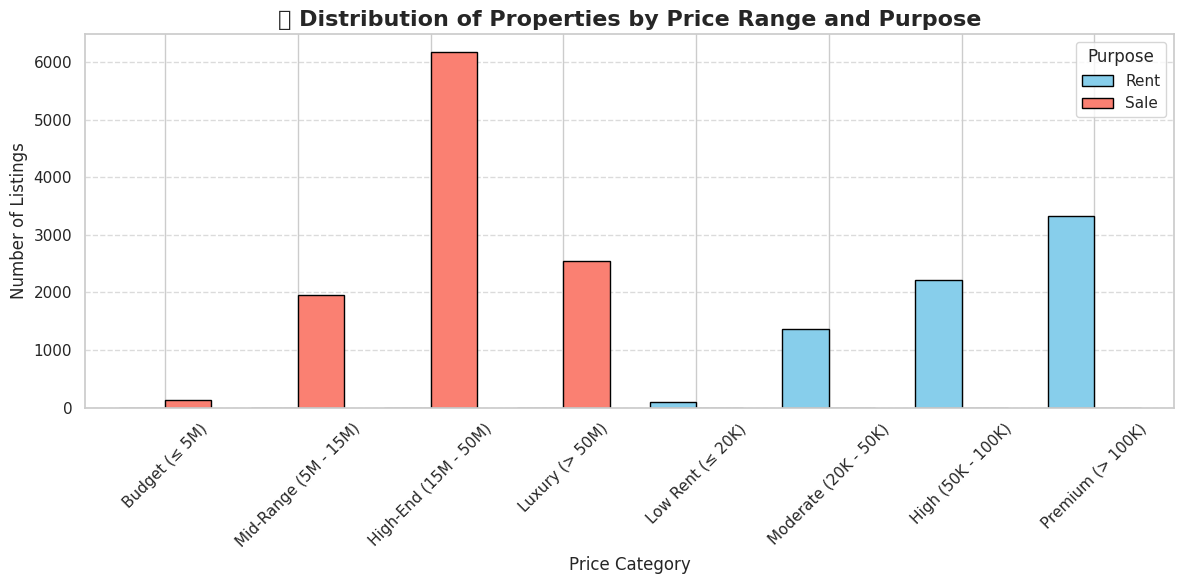

  Purpose       Price_Bin_Label  Counts
0    Rent     High (50K - 100K)    2211
1    Rent      Low Rent (≤ 20K)      99
2    Rent  Moderate (20K - 50K)    1359
3    Rent      Premium (> 100K)    3321
4    Sale         Budget (≤ 5M)     143
5    Sale  High-End (15M - 50M)    6170
6    Sale        Luxury (> 50M)    2547
7    Sale  Mid-Range (5M - 15M)    1948


In [796]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for clean visuals
sns.set_theme(style="whitegrid")

# 🎯 Step 1: Create human-readable price range labels
# Update labels with ranges for better interpretation
df['Price_Bin_Label'] = df['Price_Bin']

# Sale Labels with Ranges
df.loc[df['Sale_Price_Bin'] == 'Budget', 'Price_Bin_Label'] = 'Budget (≤ 5M)'
df.loc[df['Sale_Price_Bin'] == 'Mid-Range', 'Price_Bin_Label'] = 'Mid-Range (5M - 15M)'
df.loc[df['Sale_Price_Bin'] == 'High-End', 'Price_Bin_Label'] = 'High-End (15M - 50M)'
df.loc[df['Sale_Price_Bin'] == 'Luxury', 'Price_Bin_Label'] = 'Luxury (> 50M)'

# Rent Labels with Ranges
df.loc[df['Rent_Price_Bin'] == 'Low Rent', 'Price_Bin_Label'] = 'Low Rent (≤ 20K)'
df.loc[df['Rent_Price_Bin'] == 'Moderate', 'Price_Bin_Label'] = 'Moderate (20K - 50K)'
df.loc[df['Rent_Price_Bin'] == 'High', 'Price_Bin_Label'] = 'High (50K - 100K)'
df.loc[df['Rent_Price_Bin'] == 'Premium Rent', 'Price_Bin_Label'] = 'Premium (> 100K)'

# 🎯 Step 2: Reorder bins for visualization
ordered_labels = [
    'Budget (≤ 5M)', 'Mid-Range (5M - 15M)', 'High-End (15M - 50M)', 'Luxury (> 50M)',
    'Low Rent (≤ 20K)', 'Moderate (20K - 50K)', 'High (50K - 100K)', 'Premium (> 100K)'
]

# Group for plot
price_bin_counts = df.groupby(['Purpose', 'Price_Bin_Label']).size().unstack().fillna(0)
price_bin_counts = price_bin_counts[ordered_labels]  # Reorder columns

# 🎯 Step 3: Plotting
ax = price_bin_counts.T.plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'salmon'],
    width=0.7,
    edgecolor='black'
)

# Titles and labels
plt.title('🏷️ Distribution of Properties by Price Range and Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Purpose', title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 🎯 Step 4: Print Value Counts Summary
value_counts_summary = df.groupby(['Purpose', 'Price_Bin_Label']).size().reset_index(name='Counts')
print(value_counts_summary)




# **City Vs Price**

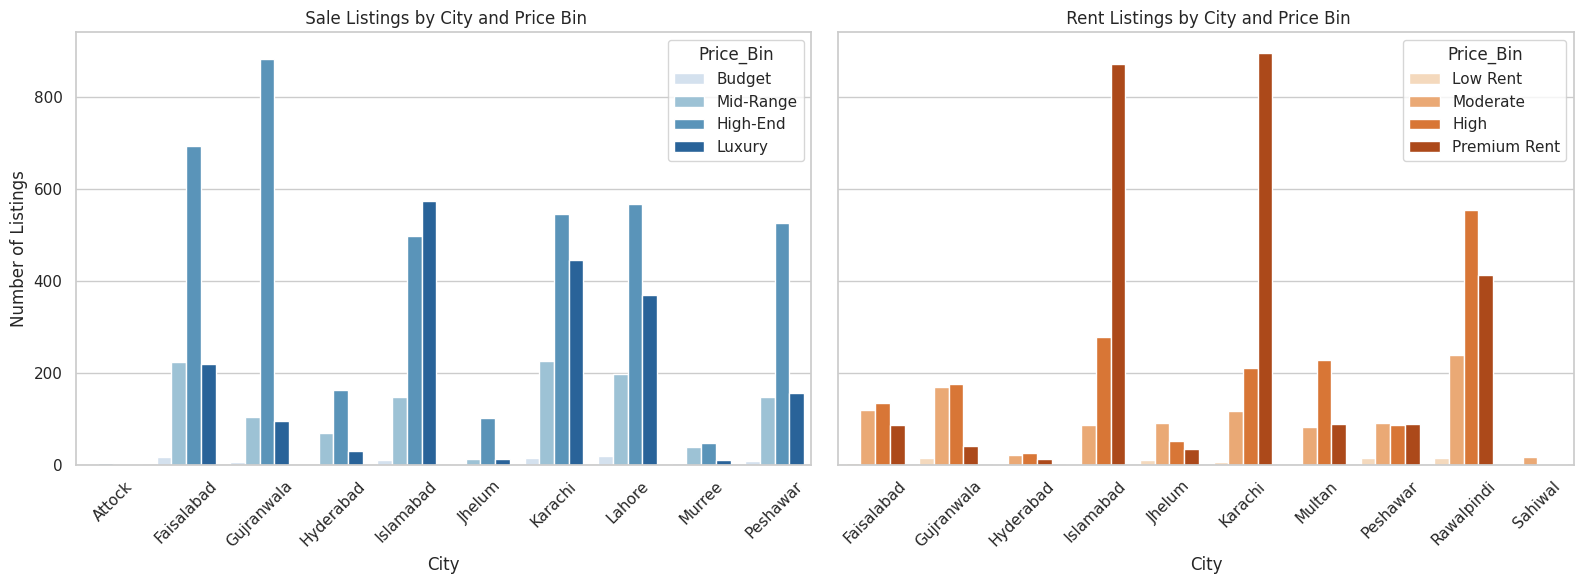

In [751]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define price bin order for consistent display
sale_bin_order = ['Budget', 'Mid-Range', 'High-End', 'Luxury']
rent_bin_order = ['Low Rent', 'Moderate', 'High', 'Premium Rent']

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Sale
sns.barplot(
    data=sale_city_bin,
    x='City', y='Counts', hue='Price_Bin',
    hue_order=sale_bin_order,
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title(' Sale Listings by City and Price Bin')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel("Number of Listings")

# Plot for Rent
sns.barplot(
    data=rent_city_bin,
    x='City', y='Counts', hue='Price_Bin',
    hue_order=rent_bin_order,
    palette='Oranges',
    ax=axes[1]
)
axes[1].set_title(' Rent Listings by City and Price Bin')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# **Average Price**

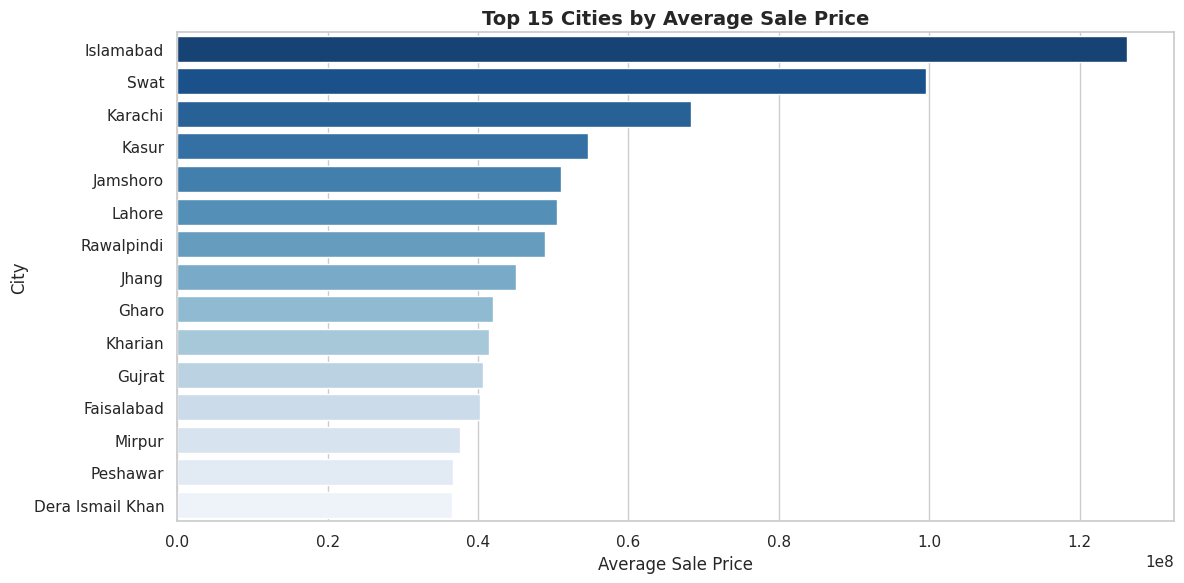

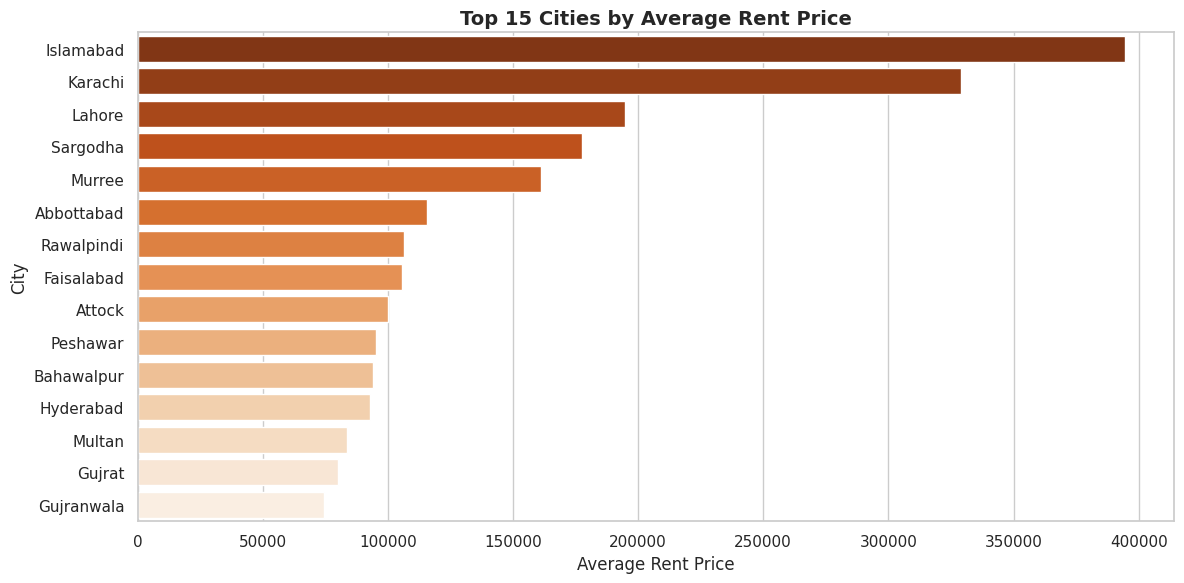

In [752]:
# SALE: Top 15 Cities by Average Sale Price
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_sale.values,
    y=avg_price_sale.index,
    hue=avg_price_sale.index,  # pretend as hue
    dodge=False,
    palette='Blues_r',
    legend=False
)
plt.title('Top 15 Cities by Average Sale Price', fontsize=14, fontweight='bold')
plt.xlabel('Average Sale Price')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# RENT: Top 15 Cities by Average Rent Price
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_rent.values,
    y=avg_price_rent.index,
    hue=avg_price_rent.index,  # same here
    dodge=False,
    palette='Oranges_r',
    legend=False
)
plt.title('Top 15 Cities by Average Rent Price', fontsize=14, fontweight='bold')
plt.xlabel('Average Rent Price')
plt.ylabel('City')
plt.tight_layout()
plt.show()



# **Listing Counts with Average price**

In [753]:
# Group separately for Sale
sale_summary = df[df['Purpose'] == 'Sale'].groupby('City').agg(
    Avg_Price=('Price', 'mean'),
    Listing_Count=('Price', 'count')
).reset_index()
sale_summary['Purpose'] = 'Sale'

# Group separately for Rent
rent_summary = df[df['Purpose'] == 'Rent'].groupby('City').agg(
    Avg_Price=('Price', 'mean'),
    Listing_Count=('Price', 'count')
).reset_index()
rent_summary['Purpose'] = 'Rent'

# Combine both
summary_df = pd.concat([sale_summary, rent_summary], axis=0)

# Sort by Avg_Price (optional: use Listing_Count if you're interested in activity)
summary_df_sorted = summary_df.sort_values('Avg_Price', ascending=False)

# Show top 20 rows
summary_df_sorted.head(50)


,City,Avg_Price,Listing_Count,Purpose
22,Islamabad,1.262545e+08,1233,Sale
52,Swat,9.958333e+07,6,Sale
26,Karachi,6.825494e+07,1238,Sale
27,Kasur,5.460000e+07,5,Sale
23,Jamshoro,5.100000e+07,1,Sale
29,Lahore,5.051996e+07,1157,Sale
44,Rawalpindi,4.894441e+07,1207,Sale
24,Jhang,4.500000e+07,1,Sale
14,Gharo,4.200000e+07,4,Sale
28,Kharian,4.150000e+07,6,Sale


In [754]:
# Top 15 cities for Sale (with at least 50 listings)
top_sale_cities = summary[
    (summary['Purpose'] == 'Sale') &
    (summary['Listing_Count'] >= 50)
].sort_values(by='Avg_Price', ascending=False).head(15)

# Top 15 cities for Rent (with at least 50 listings)
top_rent_cities = summary[
    (summary['Purpose'] == 'Rent') &
    (summary['Listing_Count'] >= 50)
].sort_values(by='Avg_Price', ascending=False).head(15)
top_sale_cities
top_rent_cities






,City,Purpose,Avg_Price,Listing_Count
30,Islamabad,Rent,394395.648670,1241
36,Karachi,Rent,329058.346840,1234
40,Lahore,Rent,194897.947455,1218
63,Rawalpindi,Rent,106379.901961,1224
15,Faisalabad,Rent,105858.166189,349
58,Peshawar,Rent,95389.084507,284
4,Bahawalpur,Rent,94038.461538,52
28,Hyderabad,Rent,92946.153846,65
48,Multan,Rent,83881.481481,405
21,Gujranwala,Rent,74696.296296,405


# **Bar Chart: Average Price for Rent & Sale (Cities with ≥ 50 Listings)**

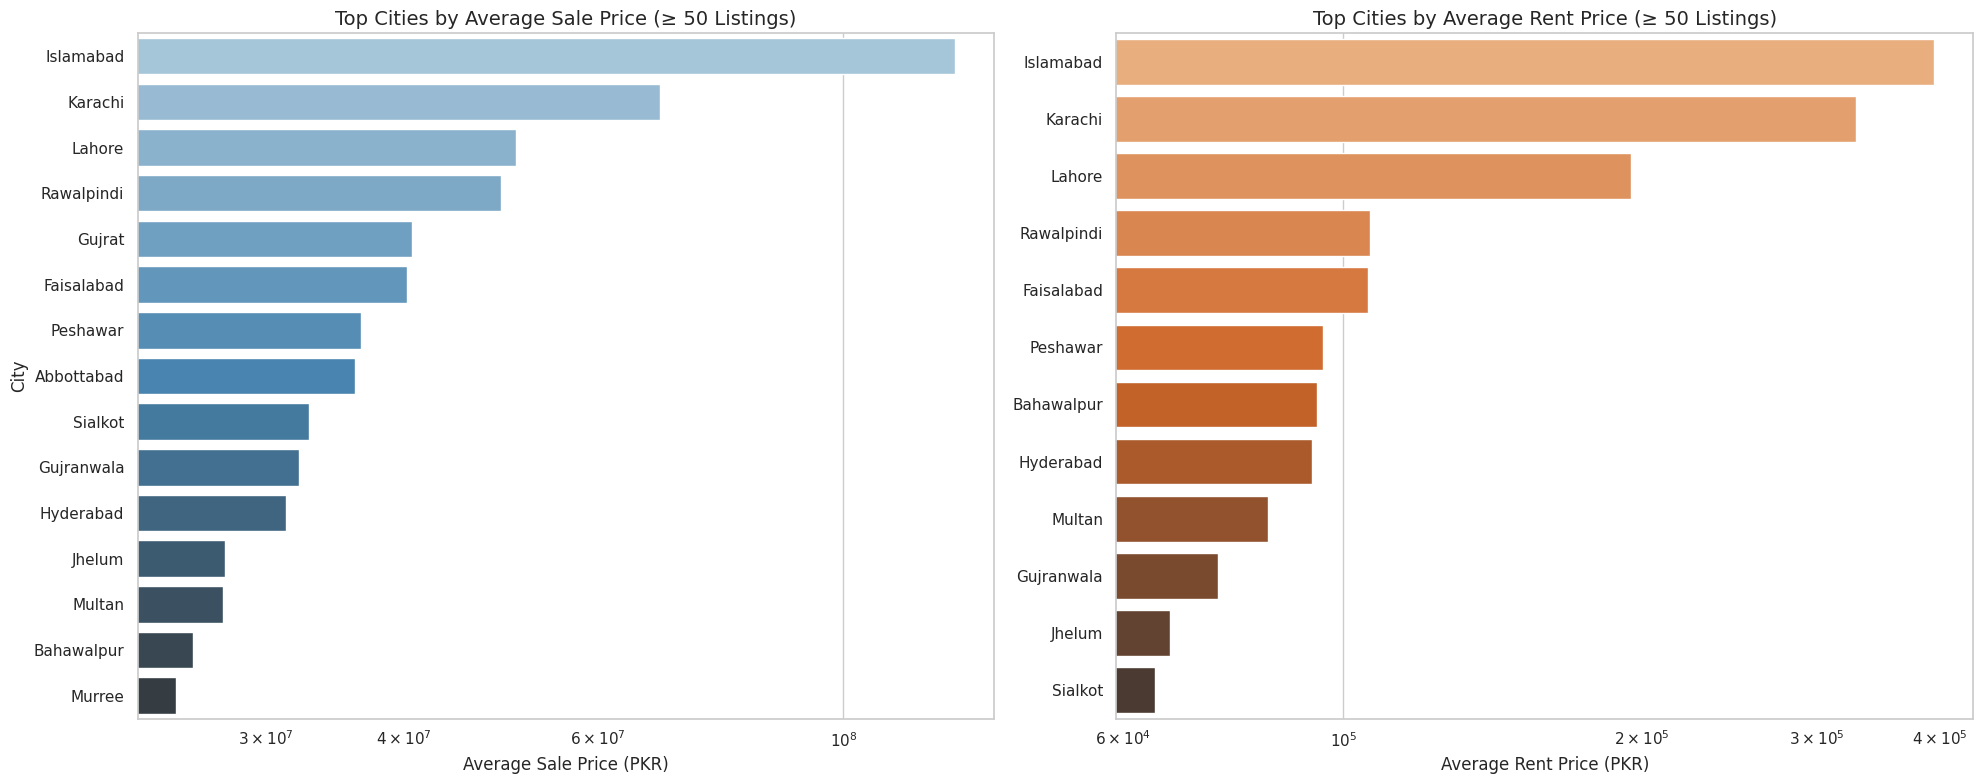

In [755]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

# 🟦 Sale chart
sns.barplot(data=top_sale_cities, y='City', x='Avg_Price', ax=axes[0], hue=top_sale_cities['City'], legend=False, palette='Blues_d')
axes[0].set_title('Top Cities by Average Sale Price (≥ 50 Listings)', fontsize=14)
axes[0].set_xlabel('Average Sale Price (PKR)')
axes[0].set_ylabel('City')
axes[0].set_xscale('log')

# 🟧 Rent chart
sns.barplot(data=top_rent_cities, y='City', x='Avg_Price', ax=axes[1], hue=top_rent_cities['City'], legend=False, palette='Oranges_d')
axes[1].set_title('Top Cities by Average Rent Price (≥ 50 Listings)', fontsize=14)
axes[1].set_xlabel('Average Rent Price (PKR)')
axes[1].set_ylabel('')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()




# **Bar Chart for Sale — Avg Price + Listing Count**

/tmp/ipython-input-756-3758717106.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_price_by_type, x='Avg_Price', y='Type', palette='viridis')


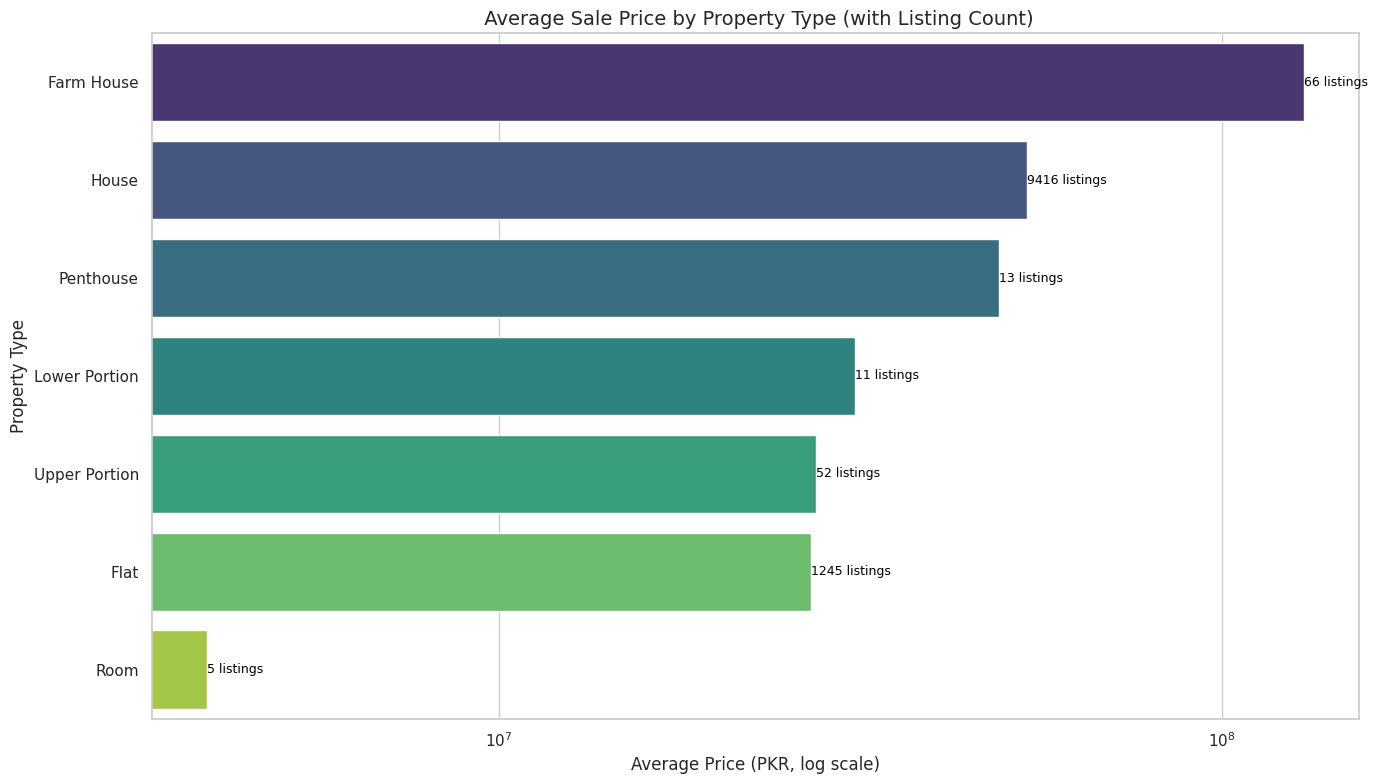

In [756]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filter Sale listings (no filtering by type count)
sale_data = df[df['Purpose'] == 'Sale'].copy()

# 2. Group by property type: get Avg Price and Listing Count
avg_price_by_type = sale_data.groupby('Type').agg(
    Avg_Price=('Price', 'mean'),
    Listing_Count=('Price', 'count')
).sort_values(by='Avg_Price', ascending=False).reset_index()

# 3. Plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=avg_price_by_type, x='Avg_Price', y='Type', palette='viridis')

plt.xscale('log')  # Log scale for wide price range
plt.title(' Average Sale Price by Property Type (with Listing Count)', fontsize=14)
plt.xlabel('Average Price (PKR, log scale)')
plt.ylabel('Property Type')

# 4. Add listing count labels on each bar
for index, row in avg_price_by_type.iterrows():
    barplot.text(row.Avg_Price, index, f"{row.Listing_Count} listings",
                 color='black', va='center', fontsize=9, ha='left')

plt.tight_layout()
plt.show()




# **Bar Chart for Rent — Avg Price + Listing Count**

/tmp/ipython-input-757-2340094757.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_price_rent, x='Avg_Price', y='Type', palette='Oranges')
/tmp/ipython-input-757-2340094757.py:27: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


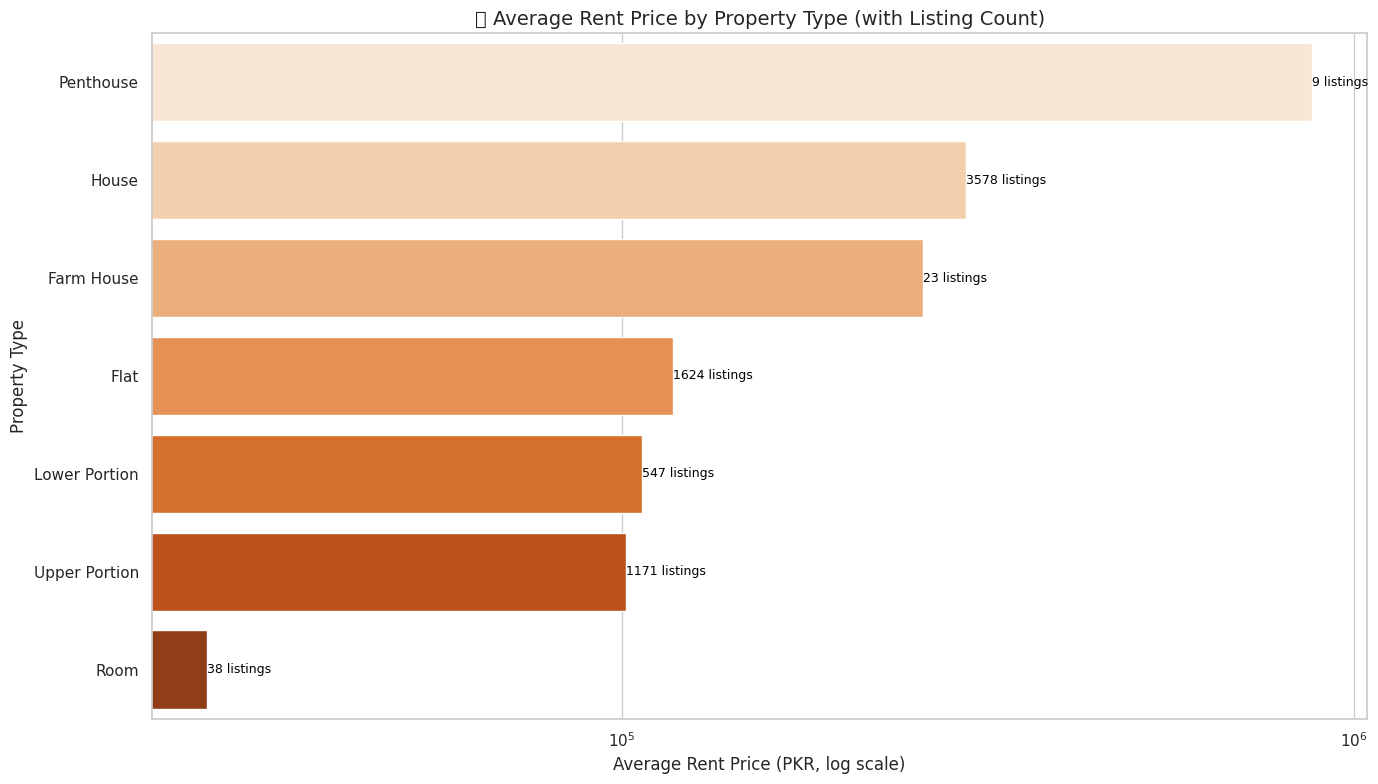

In [757]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filter Rent listings
rent_data = df[df['Purpose'] == 'Rent'].copy()

# 2. Group by property type: Avg price & listing count
avg_price_rent = rent_data.groupby('Type').agg(
    Avg_Price=('Price', 'mean'),
    Listing_Count=('Price', 'count')
).sort_values(by='Avg_Price', ascending=False).reset_index()

# 3. Plot bar chart
plt.figure(figsize=(14, 8))
bar = sns.barplot(data=avg_price_rent, x='Avg_Price', y='Type', palette='Oranges')

plt.xscale('log')  # Rent prices also vary greatly
plt.title('🏘️ Average Rent Price by Property Type (with Listing Count)', fontsize=14)
plt.xlabel('Average Rent Price (PKR, log scale)')
plt.ylabel('Property Type')

# 4. Add listing count labels
for i, row in avg_price_rent.iterrows():
    bar.text(row.Avg_Price, i, f"{row.Listing_Count} listings", color='black', va='center', fontsize=9, ha='left')

plt.tight_layout()
plt.show()


/tmp/ipython-input-758-3164944374.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_counts = df[df['Purpose'] == 'Sale'].groupby(['City', 'Sale_Price_Bin']).size().reset_index(name='Count')
/tmp/ipython-input-758-3164944374.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_counts = df[df['Purpose'] == 'Rent'].groupby(['City', 'Rent_Price_Bin']).size().reset_index(name='Count')


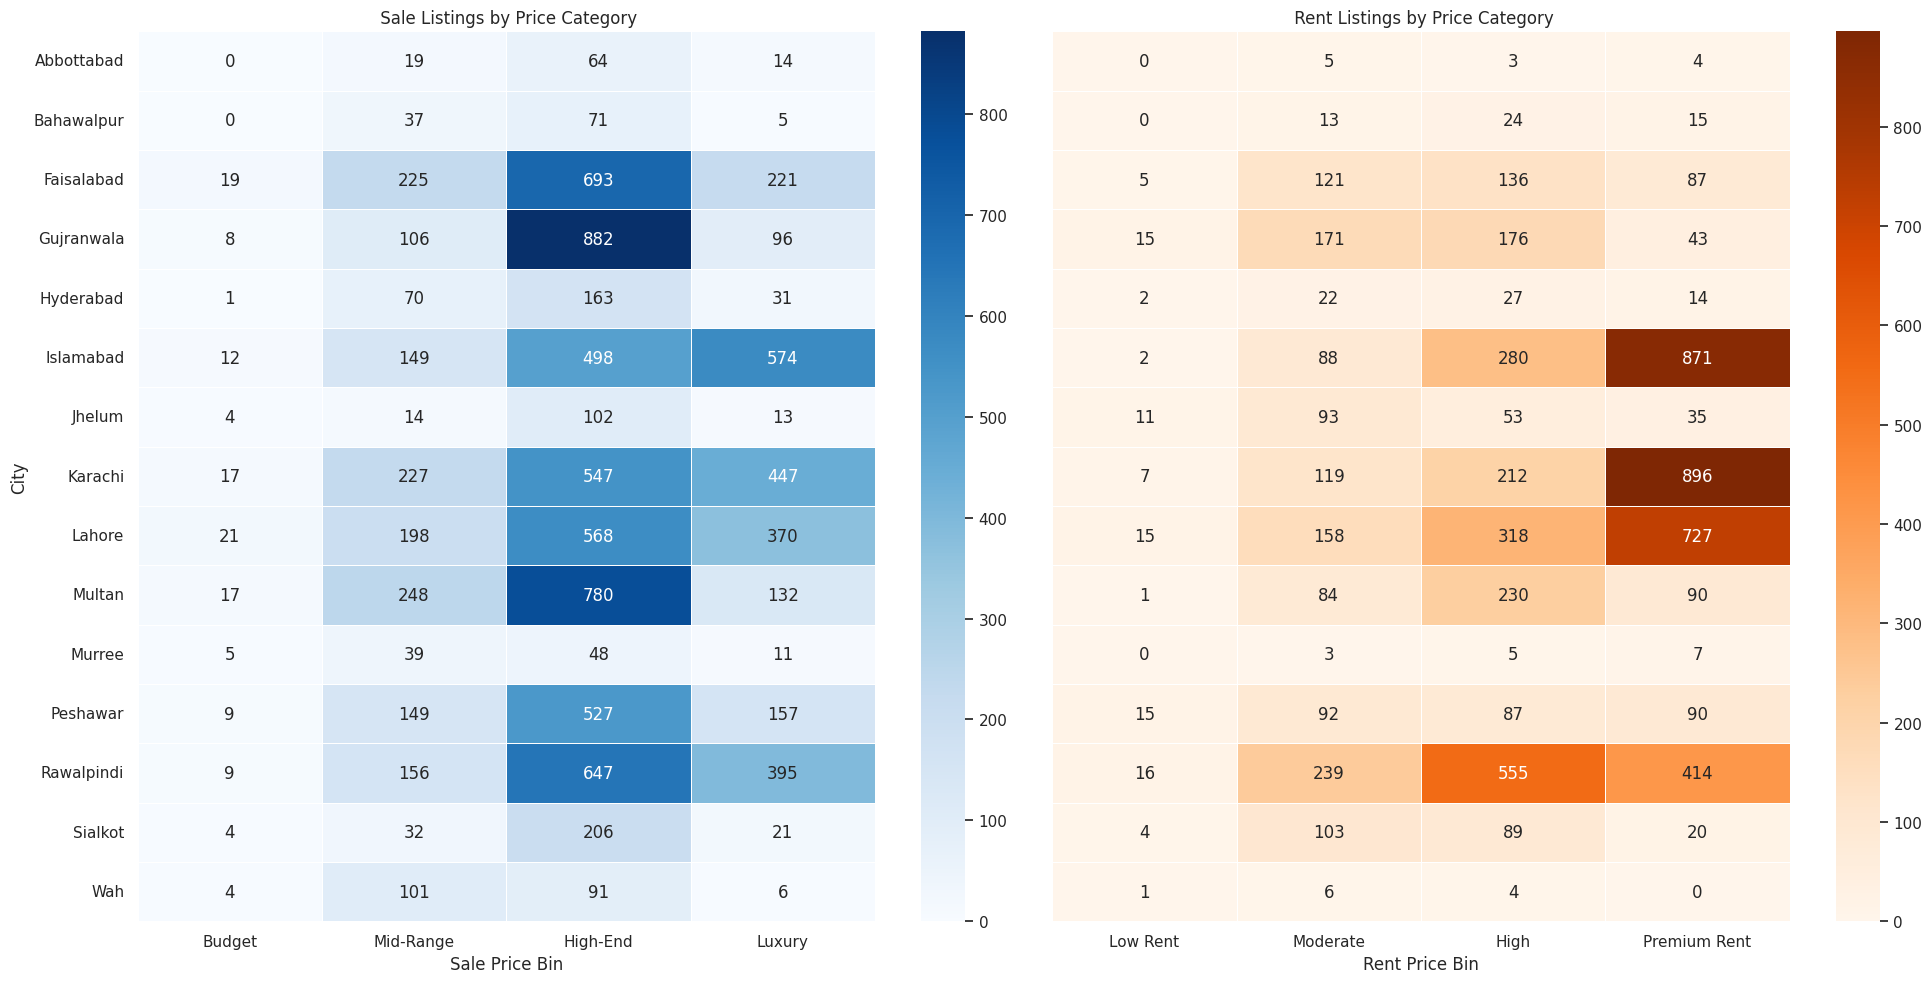

In [758]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Group Sale and Rent data separately
sale_counts = df[df['Purpose'] == 'Sale'].groupby(['City', 'Sale_Price_Bin']).size().reset_index(name='Count')
rent_counts = df[df['Purpose'] == 'Rent'].groupby(['City', 'Rent_Price_Bin']).size().reset_index(name='Count')

# 2. Pivot for heatmaps
sale_heatmap = sale_counts.pivot(index='City', columns='Sale_Price_Bin', values='Count').fillna(0)
rent_heatmap = rent_counts.pivot(index='City', columns='Rent_Price_Bin', values='Count').fillna(0)

# 3. Keep only top 15 cities by total listings (to keep chart clean)
top_cities = df['City'].value_counts().nlargest(15).index
sale_heatmap = sale_heatmap.loc[sale_heatmap.index.isin(top_cities)]
rent_heatmap = rent_heatmap.loc[rent_heatmap.index.isin(top_cities)]

# 4. Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Sale heatmap
sns.heatmap(sale_heatmap, annot=True, fmt='g', cmap='Blues', linewidths=0.5, ax=axes[0])
axes[0].set_title(' Sale Listings by Price Category')
axes[0].set_xlabel('Sale Price Bin')
axes[0].set_ylabel('City')

# Rent heatmap
sns.heatmap(rent_heatmap, annot=True, fmt='g', cmap='Oranges', linewidths=0.5, ax=axes[1])
axes[1].set_title(' Rent Listings by Price Category')
axes[1].set_xlabel('Rent Price Bin')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


# **Boxplot for Sale Price by Property Type**

/tmp/ipython-input-759-686449902.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sale_data_filtered, x='Price', y='Type', palette='Blues', showfliers=True)
/tmp/ipython-input-759-686449902.py:20: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


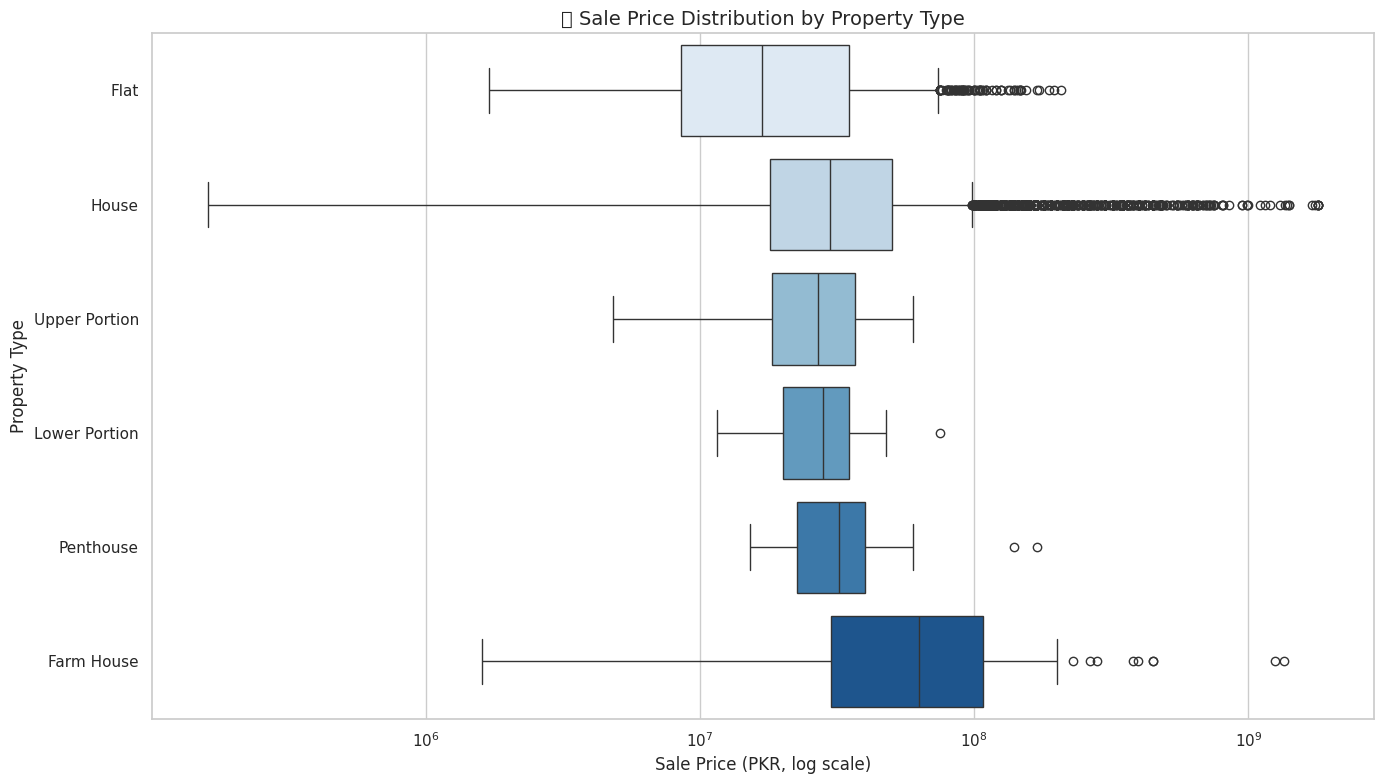

In [759]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter sale listings
sale_data = df[df['Purpose'] == 'Sale'].copy()

# 2. Remove rare property types to reduce noise (optional but helpful)
type_counts_sale = sale_data['Type'].value_counts()
valid_sale_types = type_counts_sale[type_counts_sale >= 10].index
sale_data_filtered = sale_data[sale_data['Type'].isin(valid_sale_types)]

# 3. Plot the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=sale_data_filtered, x='Price', y='Type', palette='Blues', showfliers=True)

plt.xscale('log')  # Helps visualize wide range from small to large sale prices
plt.title('📦 Sale Price Distribution by Property Type', fontsize=14)
plt.xlabel('Sale Price (PKR, log scale)')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()


# **Boxplot for Rent Price by Property Type**

/tmp/ipython-input-760-2905965610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rent_data_filtered, x='Price', y='Type', palette='Oranges', showfliers=True)
/tmp/ipython-input-760-2905965610.py:14: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


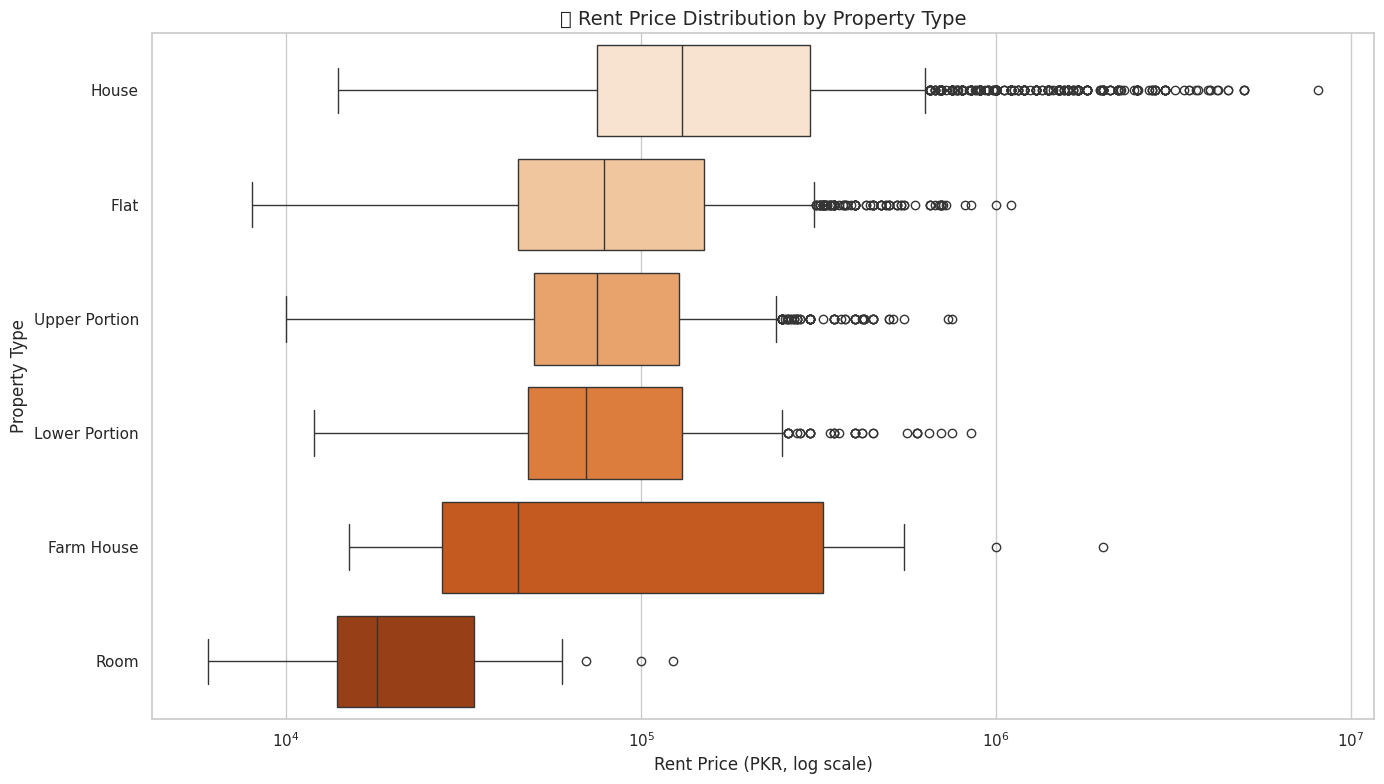

In [760]:
# Optional: Remove rare types to avoid noisy boxplot (threshold = 10 listings)
type_counts_rent = rent_data['Type'].value_counts()
valid_rent_types = type_counts_rent[type_counts_rent >= 10].index
rent_data_filtered = rent_data[rent_data['Type'].isin(valid_rent_types)]

# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=rent_data_filtered, x='Price', y='Type', palette='Oranges', showfliers=True)

plt.xscale('log')  # Helps spread out price ranges
plt.title('📦 Rent Price Distribution by Property Type', fontsize=14)
plt.xlabel('Rent Price (PKR, log scale)')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()


In [761]:
# Count listings by City and Property Type
type_trend = df.groupby(['City', 'Type']).size().reset_index(name='Listing_Count')

# Sort to see most common types in each city
top_type_per_city = type_trend.sort_values(['City', 'Listing_Count'], ascending=[True, False])

# Optional: See top 5 property types per city
top_types = top_type_per_city.groupby('City').head(5)

top_types.head(20)  # View some sample rows


,City,Type,Listing_Count
1,Abbottabad,House,101
0,Abbottabad,Flat,4
4,Abbottabad,Upper Portion,2
2,Abbottabad,Lower Portion,1
3,Abbottabad,Room,1
5,Attock,House,12
6,Bahawalpur,House,147
7,Bahawalpur,Lower Portion,14
8,Bahawalpur,Upper Portion,4
9,Buner,House,2


# **Heatmap: Property Type Trends by City**

/tmp/ipython-input-762-2336634850.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


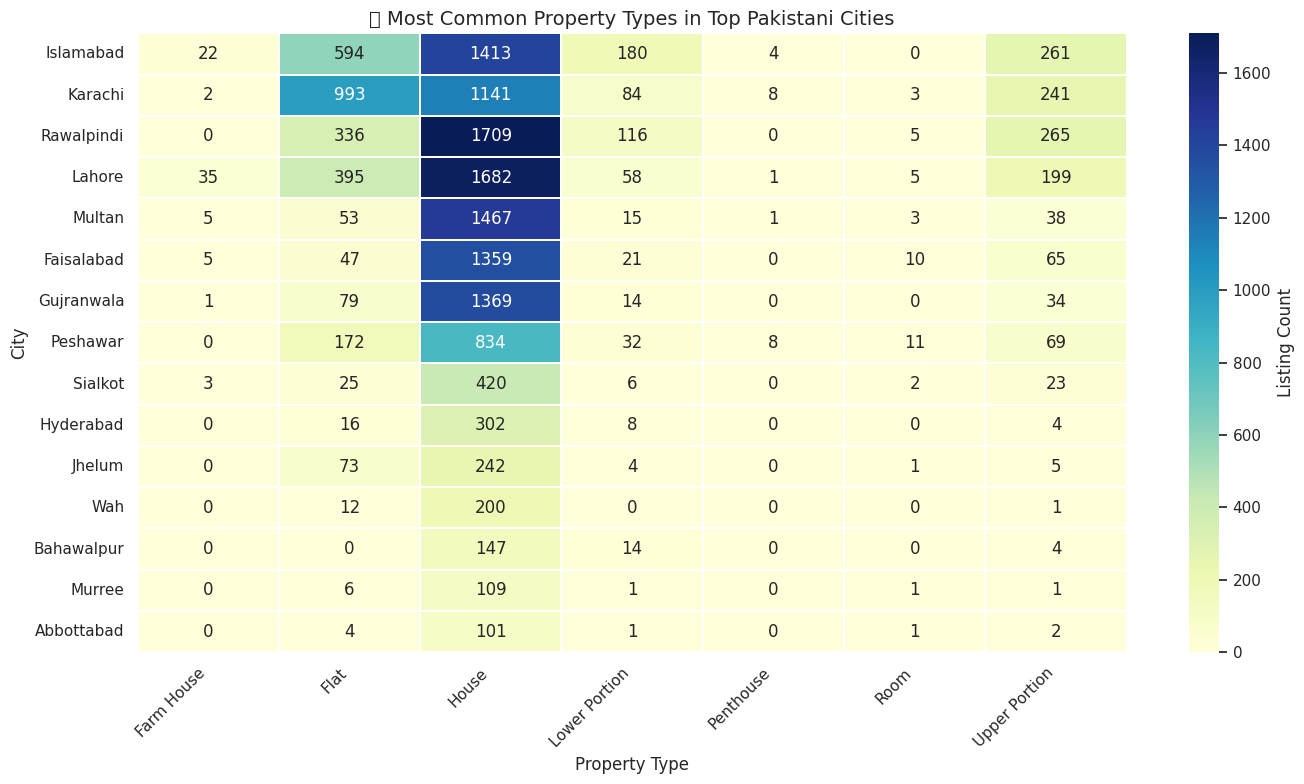

In [762]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Count listings by City × Type
pivot = df.groupby(['City', 'Type']).size().unstack(fill_value=0)

# 2. Optional: Focus on top 15 cities with most listings
top_cities = df['City'].value_counts().nlargest(15).index
pivot = pivot.loc[pivot.index.isin(top_cities)]

# 3. Optional: Sort cities by total listings
pivot['Total'] = pivot.sum(axis=1)
pivot = pivot.sort_values('Total', ascending=False).drop(columns='Total')

# 4. Plot
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.3, annot=True, fmt='d', cbar_kws={'label': 'Listing Count'})

plt.title('📊 Most Common Property Types in Top Pakistani Cities', fontsize=14)
plt.xlabel('Property Type')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Price vs. Number of Bedrooms**

/tmp/ipython-input-763-2681903627.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_bed, x='Bedrooms', y='Price', palette='crest')
/tmp/ipython-input-763-2681903627.py:20: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


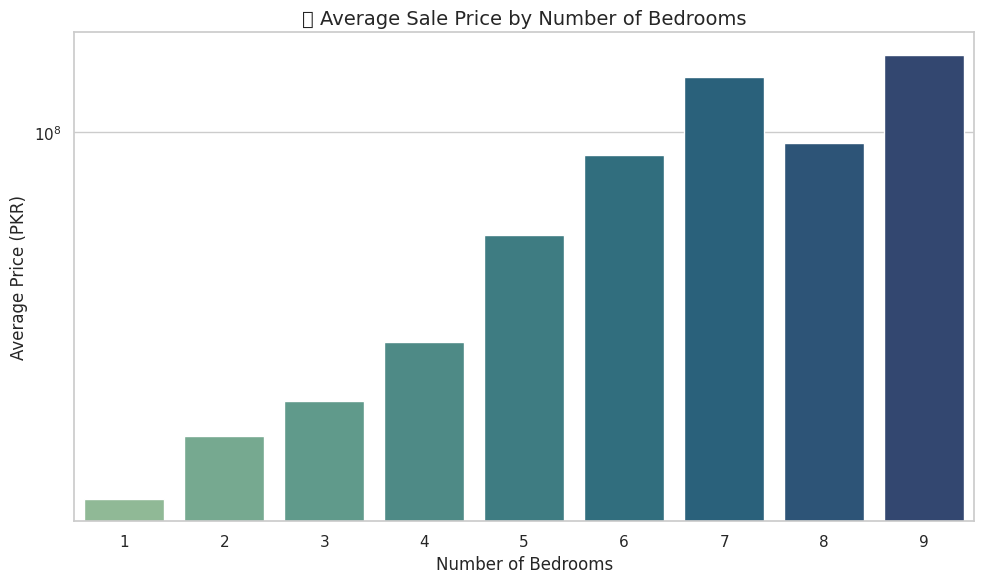

In [763]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter: Sale listings with valid bedroom and price
bedroom_data = df[(df['Purpose'] == 'Sale') & (df['Bedrooms'].notnull()) & (df['Price'].notnull())]
bedroom_data = bedroom_data[bedroom_data['Bedrooms'] <= 10]  # optional cap

# Group by Bedrooms
avg_price_by_bed = bedroom_data.groupby('Bedrooms')['Price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_bed, x='Bedrooms', y='Price', palette='crest')

plt.title('🏠 Average Sale Price by Number of Bedrooms', fontsize=14)
plt.ylabel('Average Price (PKR)')
plt.xlabel('Number of Bedrooms')
plt.yscale('log')  # To manage price skew
plt.tight_layout()
plt.show()



# **📊 Heatmap: Property Type vs. Number of Bedrooms**

/tmp/ipython-input-764-3124444648.py:25: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


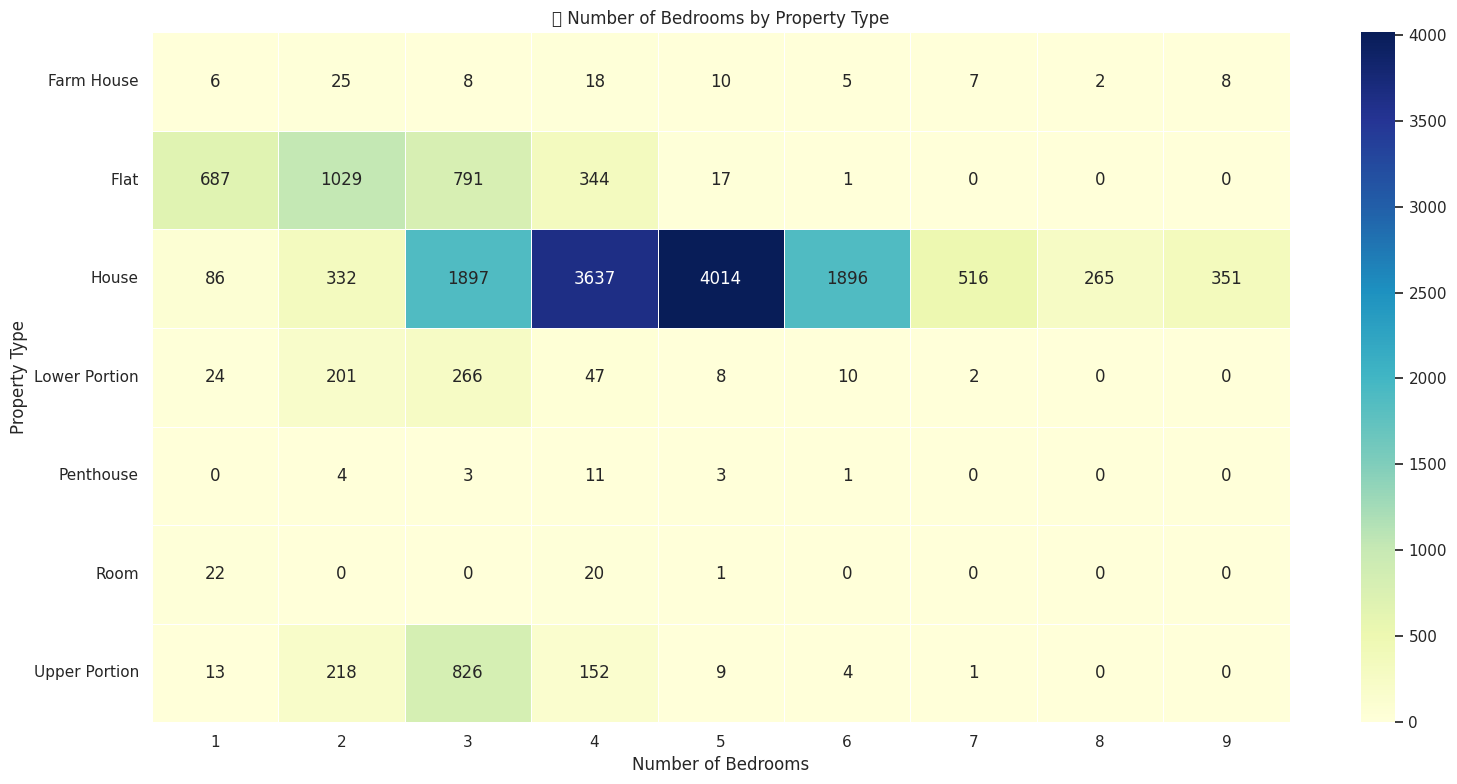

In [764]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filter out rows with missing or zero bedrooms
bedroom_data = df[df['Bedrooms'].notnull() & (df['Bedrooms'] > 0)]

# 2. Group and count number of listings by Type and Bedrooms
bedroom_counts = bedroom_data.groupby(['Type', 'Bedrooms']).size().reset_index(name='Count')

# 3. Pivot for heatmap
bedroom_pivot = bedroom_counts.pivot(index='Type', columns='Bedrooms', values='Count').fillna(0)

# 4. Keep common property types (optional for clean visual)
top_types = df['Type'].value_counts().loc[lambda x: x > 20].index
bedroom_pivot = bedroom_pivot.loc[bedroom_pivot.index.isin(top_types)]

# 5. Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(bedroom_pivot, annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5)

plt.title('🛏️ Number of Bedrooms by Property Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()


# **🔥 Heatmap: Bedrooms vs Price Bins (for Sale Listings)**

/tmp/ipython-input-765-3973835304.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bedroom_pricebin = sale_bedroom_data.groupby(['Sale_Price_Bin', 'Bedrooms']).size().reset_index(name='Count')
/tmp/ipython-input-765-3973835304.py:28: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


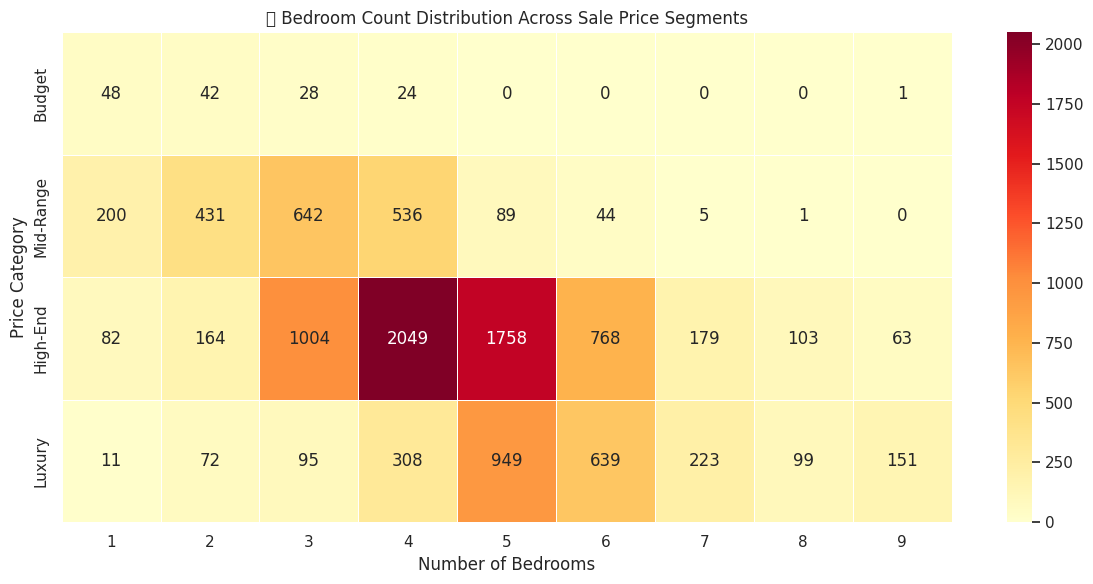

In [765]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filter only Sale listings with valid bedroom and price bin
sale_bedroom_data = df[
    (df['Purpose'] == 'Sale') &
    (df['Bedrooms'].notnull()) &
    (df['Bedrooms'] > 0) &
    (df['Bedrooms'] <= 10) &
    (df['Sale_Price_Bin'].notnull())
]

# 2. Group and pivot for heatmap
bedroom_pricebin = sale_bedroom_data.groupby(['Sale_Price_Bin', 'Bedrooms']).size().reset_index(name='Count')
heatmap_data = bedroom_pricebin.pivot(index='Sale_Price_Bin', columns='Bedrooms', values='Count').fillna(0)

# 3. Sort bedroom columns
heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

# 4. Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5)

plt.title('🛏️ Bedroom Count Distribution Across Sale Price Segments')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price Category')
plt.tight_layout()
plt.show()


/tmp/ipython-input-766-611345925.py:36: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


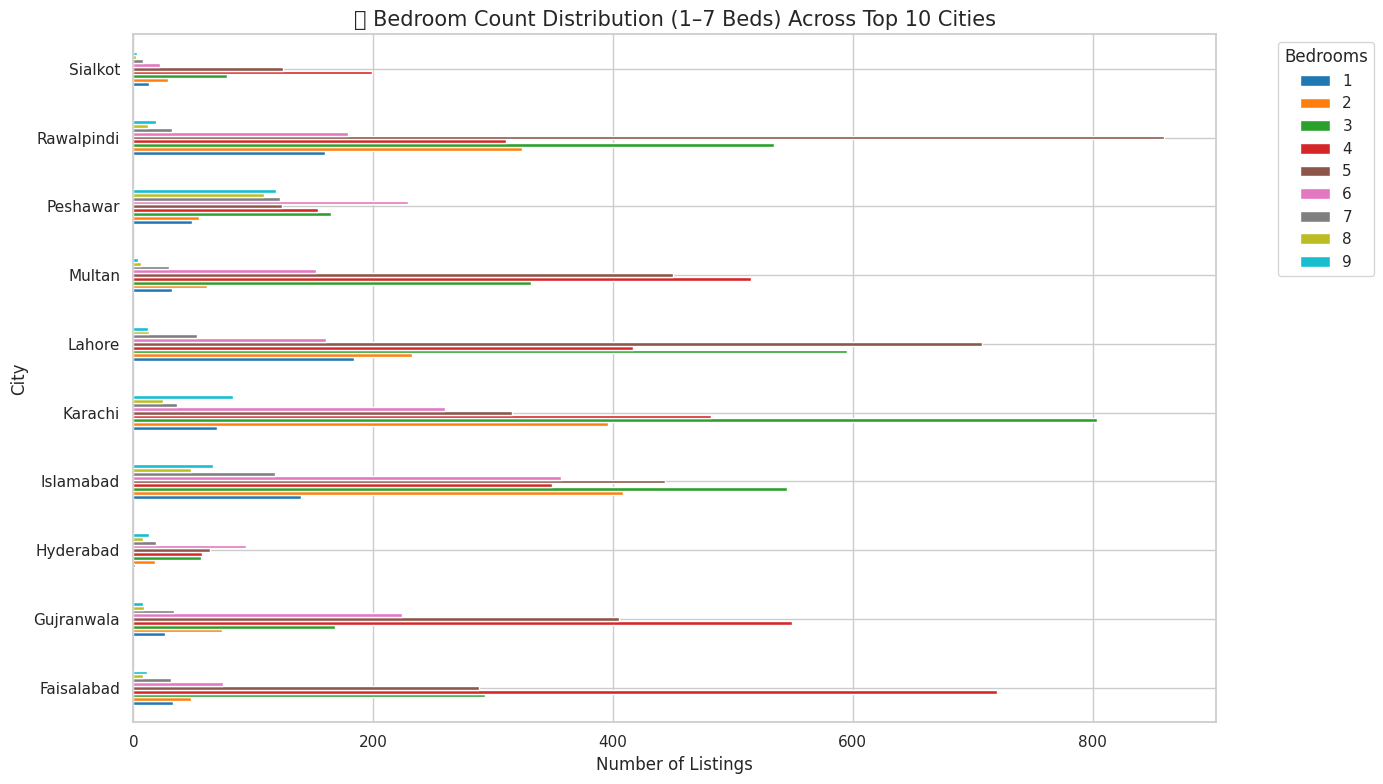

In [766]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filter only listings with 1–7 bedrooms
bedroom_data = df[
    (df['Bedrooms'].notnull()) &
    (df['Bedrooms'] > 0) &
    (df['Bedrooms'] <= 9)
]

# 2. Select top 10 cities based on listing count
top_cities = bedroom_data['City'].value_counts().head(10).index
filtered = bedroom_data[bedroom_data['City'].isin(top_cities)]

# 3. Group by City and Bedrooms, then pivot
city_bedroom_counts = (
    filtered.groupby(['City', 'Bedrooms'])
    .size()
    .reset_index(name='Count')
    .pivot(index='City', columns='Bedrooms', values='Count')
    .fillna(0)
)

# 4. Sort bedroom columns for clean axis
city_bedroom_counts = city_bedroom_counts[sorted(city_bedroom_counts.columns)]

# 5. Plot: Grouped horizontal bar chart
plt.figure(figsize=(14, 8))
city_bedroom_counts.plot(kind='barh', stacked=False, colormap='tab10', figsize=(14, 8))

plt.title('🛏️ Bedroom Count Distribution (1–7 Beds) Across Top 10 Cities', fontsize=15)
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.legend(title='Bedrooms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





# **Common Property types for Rent**

/tmp/ipython-input-767-2266798516.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_counts, y='Property Type', x='Count', palette='Oranges_r')
/tmp/ipython-input-767-2266798516.py:17: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


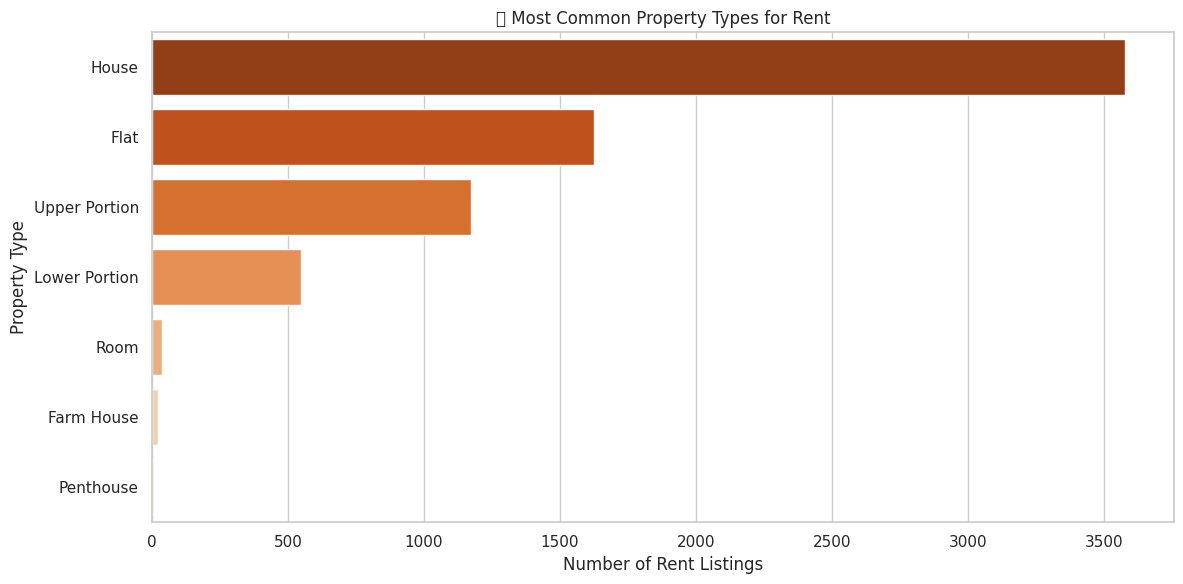

In [767]:
# Filter Rent listings only
rent_data = df[df['Purpose'] == 'Rent']

# Count property types
type_counts = rent_data['Type'].value_counts().reset_index()
type_counts.columns = ['Property Type', 'Count']

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=type_counts, y='Property Type', x='Count', palette='Oranges_r')
plt.title('🏘️ Most Common Property Types for Rent')
plt.xlabel('Number of Rent Listings')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()


In [768]:
top_rent_cities = df[df['Purpose'] == 'Rent']['City'].value_counts().head(10).index
top_rent_cities

Index(['Islamabad', 'Karachi', 'Rawalpindi', 'Lahore', 'Gujranwala', 'Multan',
       'Faisalabad', 'Peshawar', 'Sialkot', 'Jhelum'],
      dtype='object', name='City')

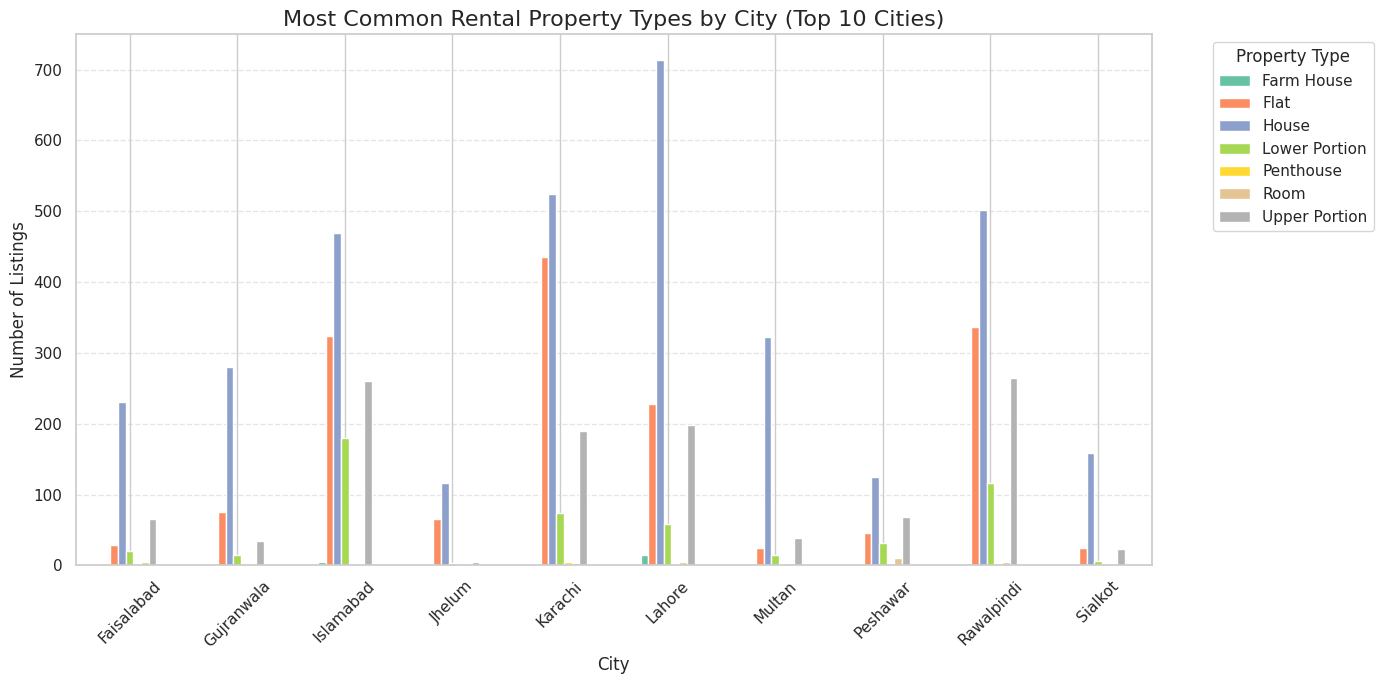

In [799]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Filter rent listings
rent_df = df[df['Purpose'] == 'Rent'].copy()

# ✅ Create a pivot table: Cities vs Property Types
rent_type_by_city = rent_df.pivot_table(
    index='City',
    columns='Type',
    values='Price',  # any column just to count entries
    aggfunc='count',
    fill_value=0
)

# ✅ Optional: Show top 10 cities with most rental listings
top_cities = rent_df['City'].value_counts().head(10).index
filtered_rent_type = rent_type_by_city.loc[rent_type_by_city.index.isin(top_cities)]

# ✅ Plot grouped bar chart
filtered_rent_type.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='Set2')
plt.title('Most Common Rental Property Types by City (Top 10 Cities)', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# **Top 10 cities in rent price categories**

/tmp/ipython-input-798-3999981768.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


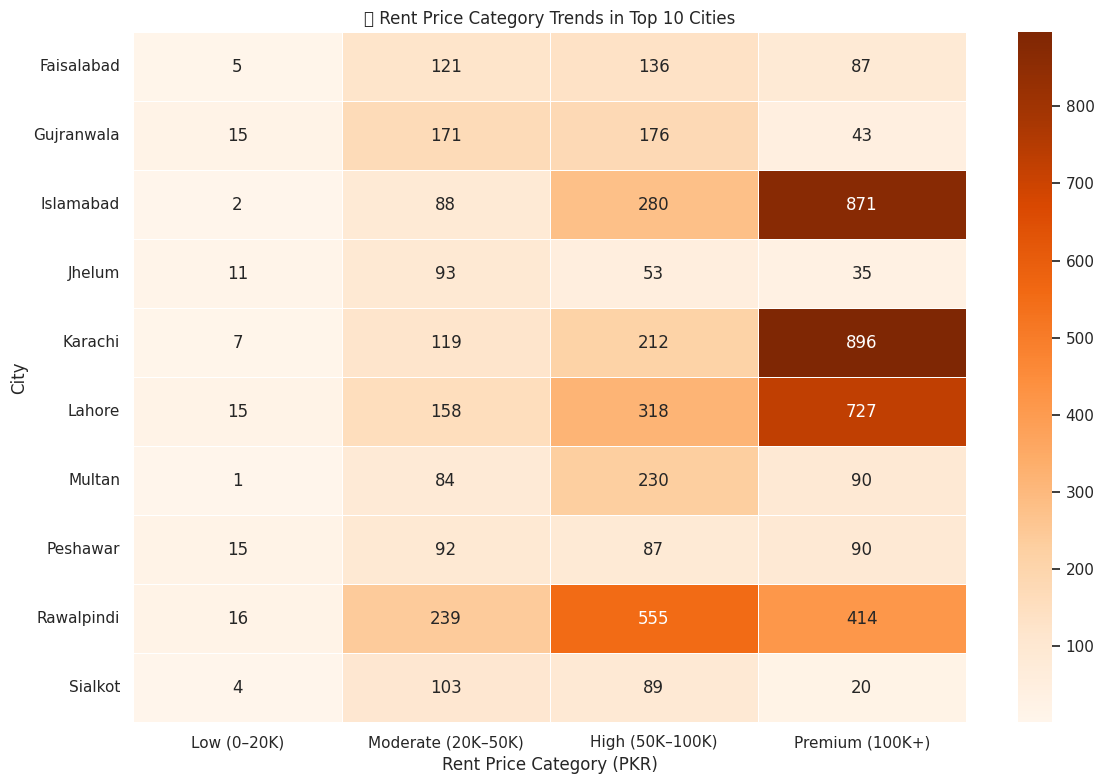

In [798]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define readable labels with price ranges
rent_bin_labels = {
    'Low Rent': 'Low (0–20K)',
    'Moderate': 'Moderate (20K–50K)',
    'High': 'High (50K–100K)',
    'Premium Rent': 'Premium (100K+)'
}

# Map labels to full descriptions
df['Rent_Price_Bin_Label'] = df['Rent_Price_Bin'].map(rent_bin_labels)

# Filter top 10 rent cities again
top_rent_cities = df[df['Purpose'] == 'Rent']['City'].value_counts().head(10).index
top_rent_data = df[(df['Purpose'] == 'Rent') & (df['City'].isin(top_rent_cities))]

# Group by updated labels
heatmap_data = top_rent_data.groupby(['City', 'Rent_Price_Bin_Label'], observed=True).size().unstack(fill_value=0)

# Reorder columns to keep consistent bin order
bin_order = ['Low (0–20K)', 'Moderate (20K–50K)', 'High (50K–100K)', 'Premium (100K+)']
heatmap_data = heatmap_data.reindex(columns=bin_order)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Oranges', linewidths=0.5)

plt.title('📊 Rent Price Category Trends in Top 10 Cities')
plt.xlabel('Rent Price Category (PKR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()



# **Avg vs Median Price per Sqft in Top Cities**

/tmp/ipython-input-770-989260621.py:26: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


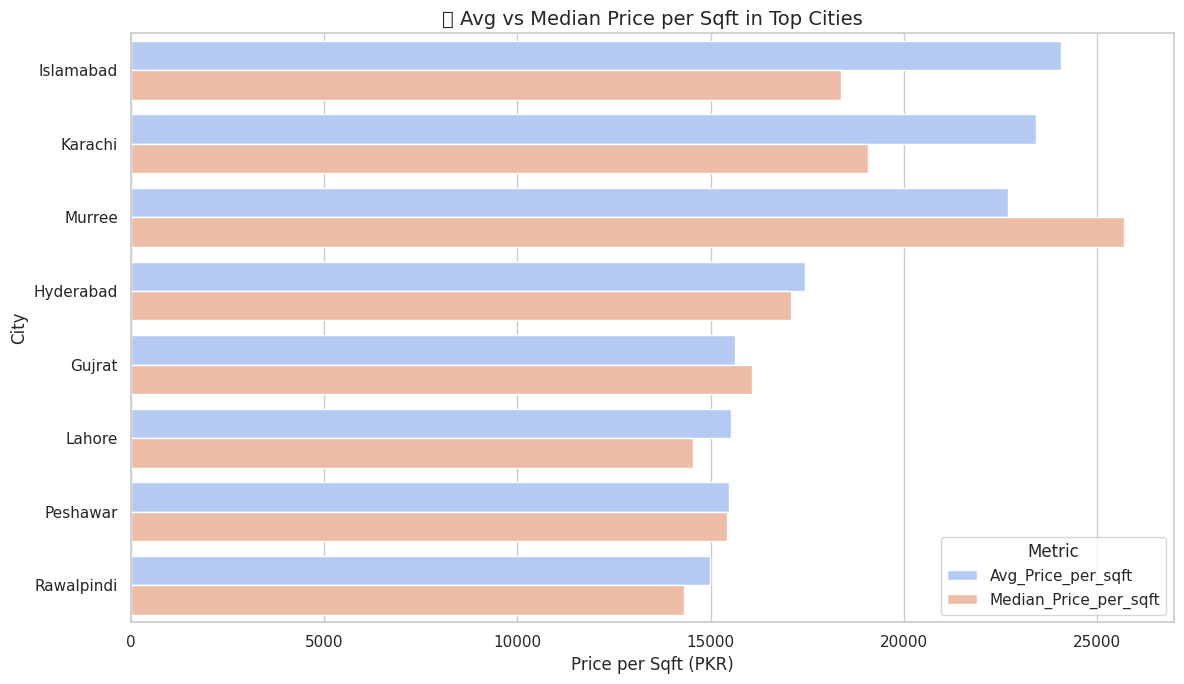

In [770]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample result table based on your data
price_sqft_city = pd.DataFrame({
    'City': ['Galyat', 'Islamabad', 'Karachi', 'Murree', 'Kharian', 'Hyderabad', 'Gujrat', 'Lahore', 'Peshawar', 'Rawalpindi'],
    'Avg_Price_per_sqft': [50505.05, 24072.98, 23430.56, 22687.57, 17945.11, 17447.71, 15629.68, 15525.74, 15475.87, 14977.47],
    'Median_Price_per_sqft': [50505.05, 18365.47, 19073.57, 25711.66, 14325.07, 17094.02, 16069.79, 14545.45, 15427.00, 14325.07],
    'Listing_Count': [1, 1232, 1237, 103, 6, 265, 99, 1156, 842, 1205]
})

# Filter cities with at least 50 listings for reliable insight
filtered = price_sqft_city[price_sqft_city['Listing_Count'] >= 50].copy()

# Plot: Avg and Median price per sqft
plt.figure(figsize=(12, 7))
bar = sns.barplot(
    data=filtered.melt(id_vars='City', value_vars=['Avg_Price_per_sqft', 'Median_Price_per_sqft']),
    x='value', y='City', hue='variable', palette='coolwarm')

plt.title("🏙️ Avg vs Median Price per Sqft in Top Cities", fontsize=14)
plt.xlabel("Price per Sqft (PKR)")
plt.ylabel("City")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


/tmp/ipython-input-775-3864649037.py:42: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


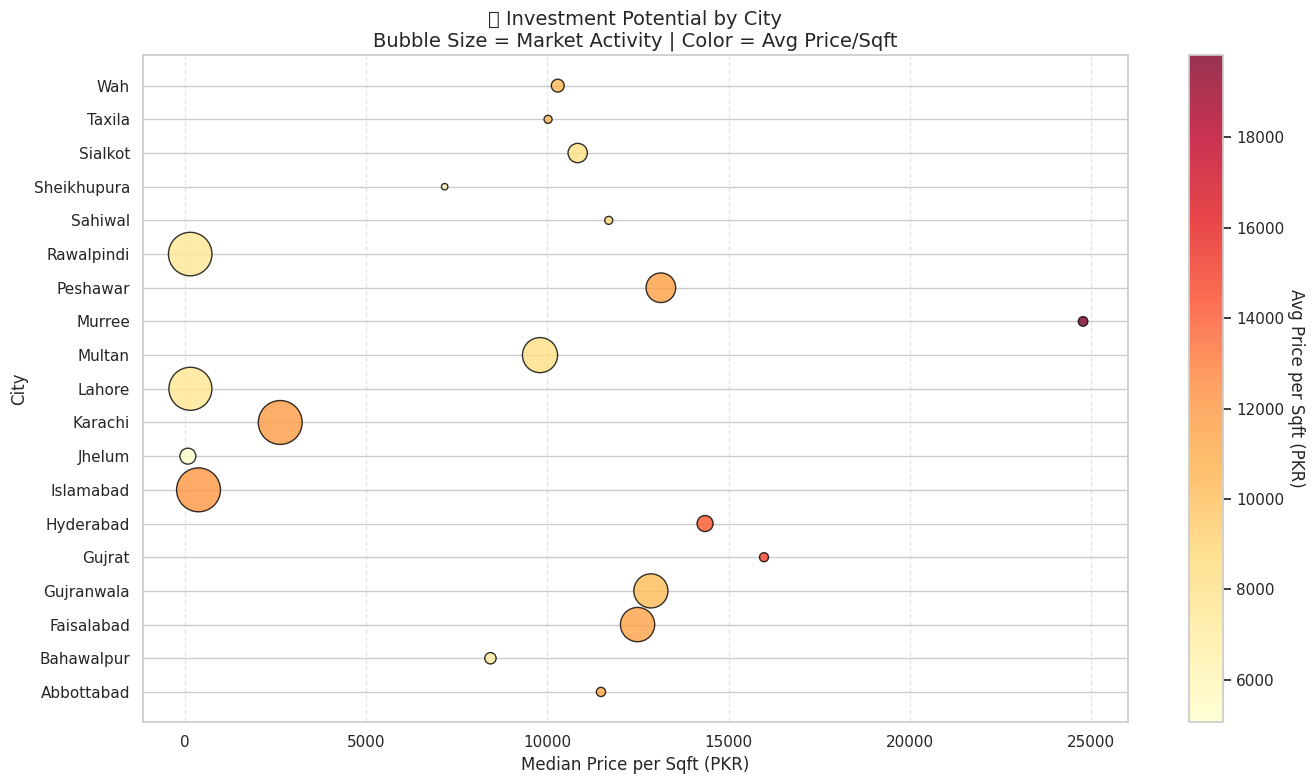

In [775]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure Price_per_sqft exists
df['Price_per_sqft'] = df['Price'] / df['Area']

# Step 2: Filter valid entries
valid_df = df[(df['Price'] > 0) & (df['Area'] > 0) & (df['Price_per_sqft'].notna())]

# Step 3: Create a new summary DataFrame (don't touch original df)
bubble_data = valid_df.groupby('City').agg(
    Avg_Price_per_sqft=('Price_per_sqft', 'mean'),
    Median_Price_per_sqft=('Price_per_sqft', 'median'),
    Listing_Count=('Price', 'count')
).reset_index()

# Step 4: Filter for cities with enough listings
top_cities = bubble_data[bubble_data['Listing_Count'] > 50].copy()
top_cities['Bubble_Size'] = top_cities['Listing_Count'] / top_cities['Listing_Count'].max() * 1000

# Step 5: Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=top_cities['Median_Price_per_sqft'],
    y=top_cities['City'],
    s=top_cities['Bubble_Size'],
    c=top_cities['Avg_Price_per_sqft'],
    cmap='YlOrRd',
    edgecolor='black',
    alpha=0.8
)

# Colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Avg Price per Sqft (PKR)', rotation=270, labelpad=15)

plt.title('💡 Investment Potential by City\nBubble Size = Market Activity | Color = Avg Price/Sqft', fontsize=14)
plt.xlabel('Median Price per Sqft (PKR)')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# **📈 What This Tells You Visually:**
Right side: More expensive cities.

Larger bubbles: More listings (more active market).

Color intensity: Higher average prices.




# **Rental Yield (ROI%) Analysis by City**

/tmp/ipython-input-779-332747146.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_rent = roi_df.groupby('City').apply(
/tmp/ipython-input-779-332747146.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_data, x='ROI_percent', y='City', palette='YlGn')
/tmp/ipython-input-779-332747146.py:41: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) D

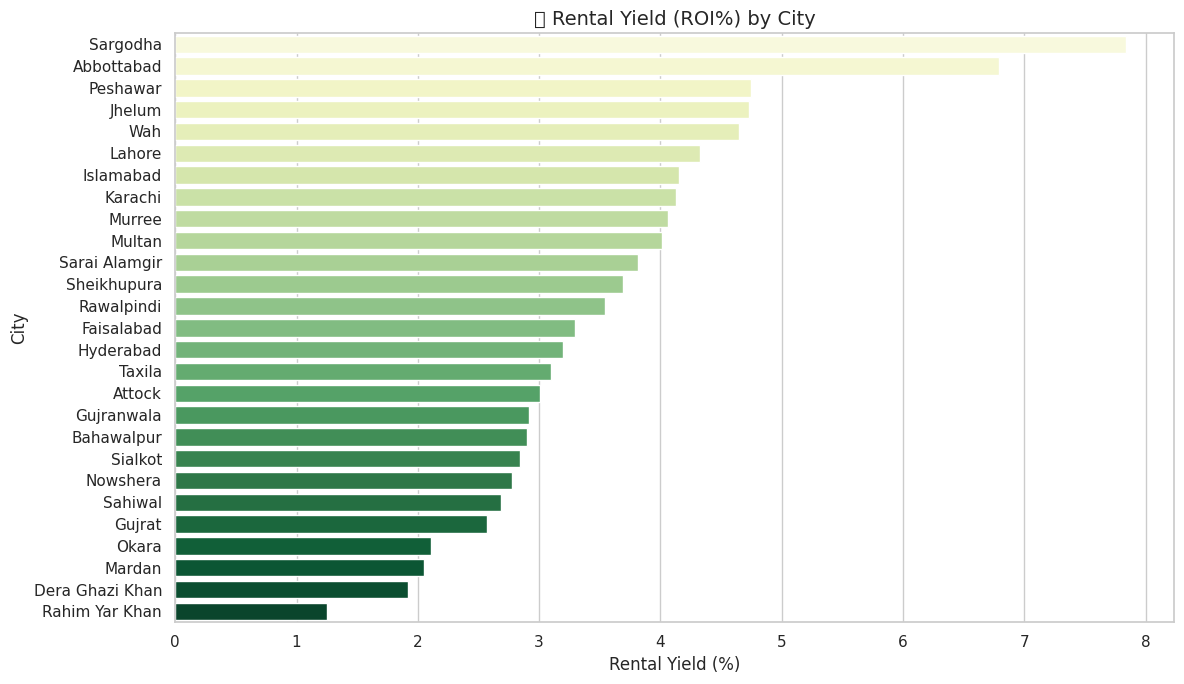

               City  ROI_percent  Total_Listings
0          Sargodha     7.842161              39
1        Abbottabad     6.795117             109
2          Peshawar     4.748046            1126
3            Jhelum     4.727009             325
4               Wah     4.647124             213
5            Lahore     4.323618            2375
6         Islamabad     4.150826            2474
7           Karachi     4.128820            2472
8            Murree     4.064484             118
9            Multan     4.011833            1582
10    Sarai Alamgir     3.818948              25
11      Sheikhupura     3.688160              53
12       Rawalpindi     3.541362            2431
13       Faisalabad     3.297802            1507
14        Hyderabad     3.196689             330
15           Taxila     3.094733              83
16           Attock     3.005160              12
17       Gujranwala     2.919965            1497
18       Bahawalpur     2.900399             165
19          Sialkot 

In [779]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Copy original DataFrame and filter Rent listings with valid area & price
roi_df = df.copy()
roi_df = roi_df[(roi_df['Purpose'] == 'Rent') & (roi_df['Price'] > 1000) & (roi_df['Area'] > 0)]

# Calculate average rent per sqft per month by city
avg_rent = roi_df.groupby('City').apply(
    lambda x: (x['Price'] / x['Area']).mean()
).reset_index(name='Avg_Rent_per_sqft_per_month')

# ✅ Step 2: Sale data: average price per sqft
avg_sale = df[df['Purpose'] == 'Sale'].copy()
avg_sale = avg_sale[avg_sale['Area'] > 0]
avg_sale['Price_per_sqft'] = avg_sale['Price'] / avg_sale['Area']
avg_sale = avg_sale.groupby('City')['Price_per_sqft'].mean().reset_index(name='Avg_Sale_Price_per_sqft')

# ✅ Step 3: Merge Rent and Sale data
roi_data = pd.merge(avg_sale, avg_rent, on='City')

# ✅ Step 4: Calculate ROI
roi_data['Annual_Rent_per_sqft'] = roi_data['Avg_Rent_per_sqft_per_month'] * 12
roi_data['ROI_percent'] = (roi_data['Annual_Rent_per_sqft'] / roi_data['Avg_Sale_Price_per_sqft']) * 100

# ✅ Step 5: Add listing counts from original df
listing_counts = df['City'].value_counts().reset_index()
listing_counts.columns = ['City', 'Total_Listings']
roi_data = pd.merge(roi_data, listing_counts, on='City', how='left')

# ✅ Step 6: Sort by ROI
roi_data = roi_data.sort_values(by='ROI_percent', ascending=False).reset_index(drop=True)

# ✅ Step 7: Plot bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=roi_data, x='ROI_percent', y='City', palette='YlGn')
plt.title('🏠 Rental Yield (ROI%) by City', fontsize=14)
plt.xlabel('Rental Yield (%)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# ✅ Optional: Show ROI + Listings in table
print(roi_data[['City', 'ROI_percent', 'Total_Listings']])



# **Price vs Area (Scatter Plot)**

/tmp/ipython-input-788-1960173889.py:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-788-1960173889.py:47: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


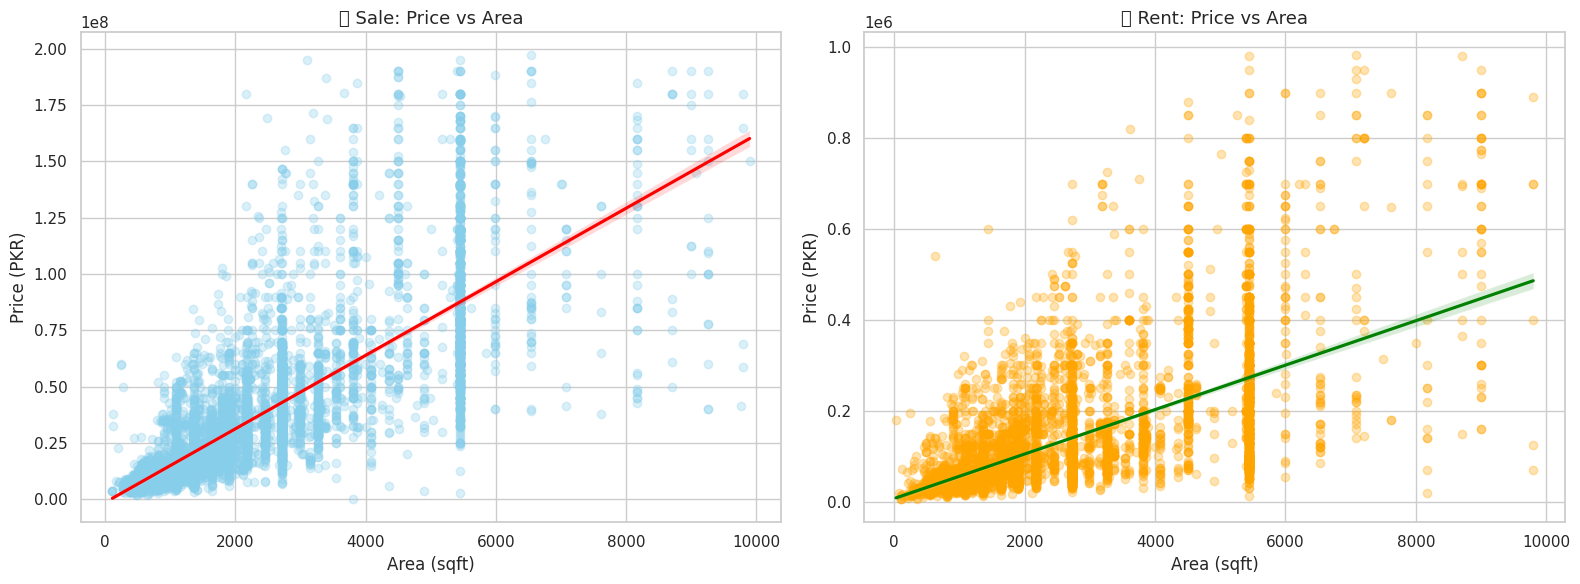

In [788]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Filter Sale listings (clean data)
sale_data = df[
    (df['Purpose'] == 'Sale') &
    (df['Price'] > 100000) & (df['Price'] < 200_000_000) &
    (df['Area'] > 0) & (df['Area'] < 10000)
]

# ✅ Filter Rent listings
rent_data = df[
    (df['Purpose'] == 'Rent') &
    (df['Price'] > 1000) & (df['Price'] < 1_000_000) &
    (df['Area'] > 0) & (df['Area'] < 10000)
]

# ✅ Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Sale Plot
sns.regplot(
    data=sale_data,
    x='Area',
    y='Price',
    scatter_kws={'alpha': 0.3, 'color': 'skyblue'},
    line_kws={'color': 'red'},
    ax=axes[0]
)
axes[0].set_title('📈 Sale: Price vs Area', fontsize=13)
axes[0].set_xlabel('Area (sqft)')
axes[0].set_ylabel('Price (PKR)')

# Rent Plot
sns.regplot(
    data=rent_data,
    x='Area',
    y='Price',
    scatter_kws={'alpha': 0.3, 'color': 'orange'},
    line_kws={'color': 'green'},
    ax=axes[1]
)
axes[1].set_title('📉 Rent: Price vs Area', fontsize=13)
axes[1].set_xlabel('Area (sqft)')
axes[1].set_ylabel('Price (PKR)')

plt.tight_layout()
plt.show()


In [790]:
import pandas as pd

# Filter for valid Sale listings
filtered = df[(df['Purpose'] == 'Sale') & (df['Price'] > 0) & (df['Area'] > 0)]

# Group by City and calculate correlation between Area and Price
correlation_results = (
    filtered.groupby('City')
    .apply(lambda x: x['Price'].corr(x['Area']))
    .reset_index(name='Area_Price_Correlation')
)

# Add listing count to ensure data reliability
listing_counts = filtered['City'].value_counts().reset_index()
listing_counts.columns = ['City', 'Listing_Count']

# Merge
correlation_results = correlation_results.merge(listing_counts, on='City')

# Filter only cities with sufficient listings
reliable = correlation_results[correlation_results['Listing_Count'] >= 100]

# Sort by correlation strength (descending)
reliable = reliable.sort_values(by='Area_Price_Correlation', ascending=False)

# Show top cities with strong and consistent area-price trends
print(reliable.head(15))


          City  Area_Price_Correlation  Listing_Count
42  Rawalpindi                0.903214           1205
20   Hyderabad                0.887198            265
39    Peshawar                0.866387            842
54         Wah                0.863310            202
25     Karachi                0.837240           1237
10  Faisalabad                0.829767           1157
35      Murree                0.796782            103
15  Gujranwala                0.738279           1091
24      Jhelum                0.700408            133
48     Sialkot                0.605510            263
28      Lahore                0.511016           1156
2   Bahawalpur                0.325836            113
21   Islamabad                0.287090           1232
34      Multan                0.279784           1176


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipython-input-790-3365532413.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping column

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipython-input-792-3159647500.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping colum

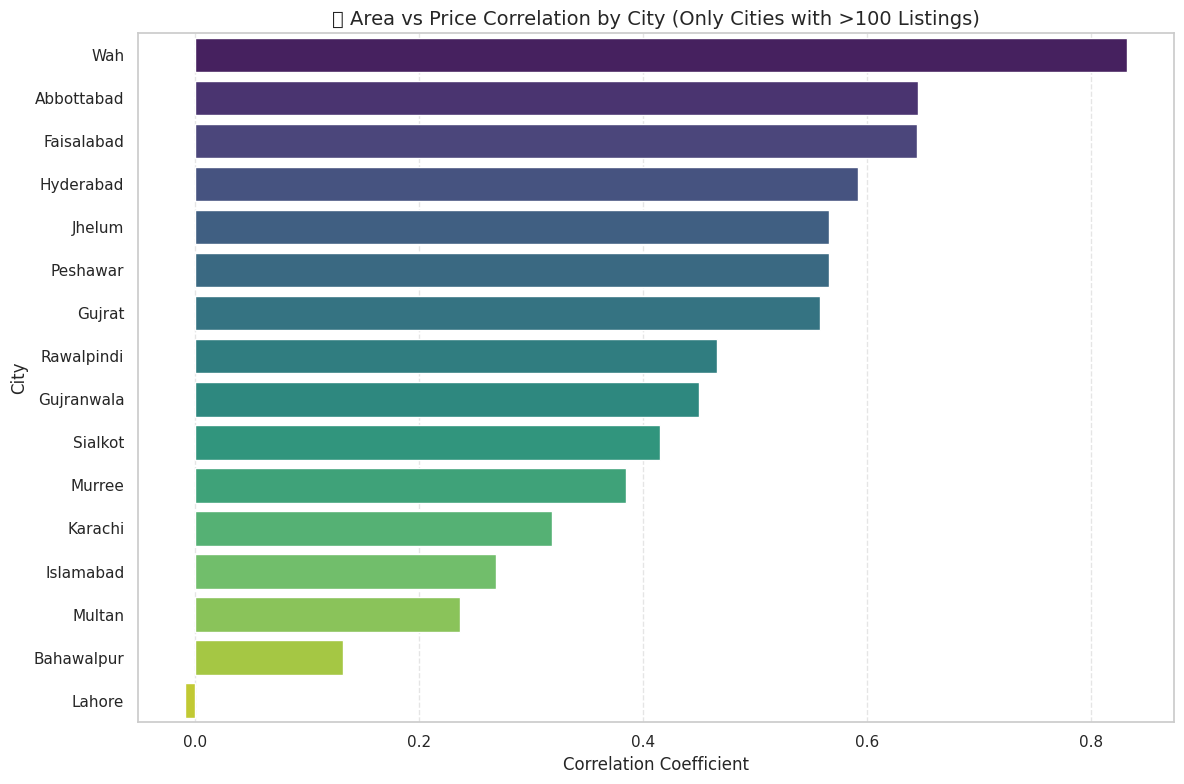

In [792]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Filter data with valid Area & Price
filtered = df[(df['Area'] > 0) & (df['Price'] > 0)]

# ✅ Step 2: Group by City and compute correlation
correlations = (
    filtered.groupby('City')
    .apply(lambda x: x['Area'].corr(x['Price']))
    .reset_index(name='Area_Price_Correlation')
)

# ✅ Step 3: Add listing counts
listing_counts = filtered['City'].value_counts().reset_index()
listing_counts.columns = ['City', 'Listing_Count']

# ✅ Step 4: Merge and filter cities with >100 listings
corr_plot_df = pd.merge(correlations, listing_counts, on='City')
corr_plot_df = corr_plot_df[corr_plot_df['Listing_Count'] > 100]

# ✅ Step 5: Sort by correlation
corr_plot_df = corr_plot_df.sort_values(by='Area_Price_Correlation', ascending=False)

# ✅ Step 6: Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=corr_plot_df,
    x='Area_Price_Correlation',
    y='City',
    palette='viridis'
)
plt.title('🏙️ Area vs Price Correlation by City (Only Cities with >100 Listings)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/tmp/ipython-input-800-4284775494.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered.head(15), x='Avg_Price_per_sqft', y='City', palette='YlOrBr')
/tmp/ipython-input-800-4284775494.py:24: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


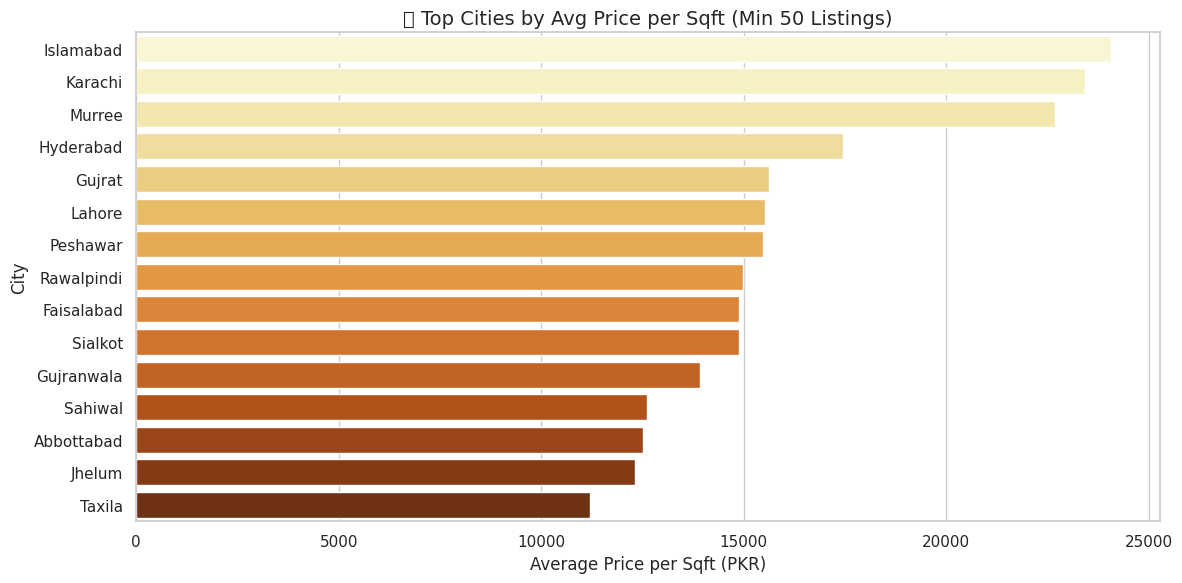

In [800]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Filter valid Sale listings with Price and Area
valid_sales = df[(df['Purpose'] == 'Sale') & (df['Area'] > 0) & (df['Price'] > 0)].copy()
valid_sales['Price_per_sqft'] = valid_sales['Price'] / valid_sales['Area']

# ✅ Step 2: Group by City to calculate average price per sqft and listing count
city_grouped = valid_sales.groupby('City').agg(
    Avg_Price_per_sqft=('Price_per_sqft', 'mean'),
    Listing_Count=('City', 'count')
).reset_index()

# ✅ Step 3: Filter cities with at least 50 listings (adjustable threshold)
filtered = city_grouped[city_grouped['Listing_Count'] >= 50].sort_values('Avg_Price_per_sqft', ascending=False)

# ✅ Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered.head(15), x='Avg_Price_per_sqft', y='City', palette='YlOrBr')
plt.title('🏙️ Top Cities by Avg Price per Sqft (Min 50 Listings)', fontsize=14)
plt.xlabel('Average Price per Sqft (PKR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

